In [495]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')

pd.pandas.set_option('display.max_columns', None)

from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [496]:
train = pd.read_csv('train.csv')

In [497]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [498]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [499]:
test = pd.read_csv('test.csv')

In [500]:
test.tail()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5.75,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,10,9,100,36,25,4,36.0,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,6,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,yes,6,no,6.00,0,0,1,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,54,36,2916,16,36,4,4.0,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,4,1.0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,yes,6,no,6.00,0,1,0,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,12,16,144,16,36,4,4.0,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,5,0.0,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,yes,6,no,6.00,0,1,0,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,12,25,144,16,36,4,4.0,1.00,36.0000,144
23855,ID_34754556f,NaN,0,3,0,1,1,0,NaN,0,1,1,0,3,3,0,4,4,4,4,6,NaN,4,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,d237404b6,2,2,0,4,yes,6,no,6.00,0,0,1,0,0,0,0,0,0,2,2.0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,1,51,36,2601,16,36,4,4.0,1.00,36.0000,2601


In [501]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [502]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

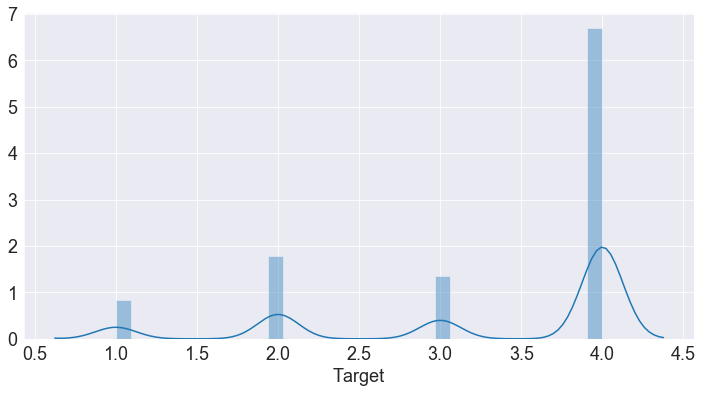

In [503]:
plt.figure(figsize = (12,6))
sns.distplot(train.Target)

This is imbalance dataset

In [504]:
test['Target'] = np.nan

In [505]:
data = pd.concat([train,test])

In [506]:
data

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.00,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.00,100.0000,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.00,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.00,144.0000,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.00,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.00,121.0000,8464,4.0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.00,121.0000,289,4.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.00,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.00,121.0000,1369,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,2,2,1,3,4,1,5,6,6,6,3,0.0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3aa78c56b,2,4,0,6,.5,5,no,5

### Let's see categorical variable

In [507]:
obj =  data.select_dtypes('O').columns
data[obj].head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [508]:
data[obj].isin(['0','1']).any()

Id            False
idhogar       False
dependency    False
edjefe        False
edjefa        False
dtype: bool

In [509]:
data[obj[2:]] = np.where(data[obj[2:]] == 'yes',1,data[obj[2:]])
data[obj[2:]] = np.where(data[obj[2:]] == 'no',0,data[obj[2:]])

### continuous variable

In [510]:
flt = data.select_dtypes('float').columns

In [511]:
flt

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'Target'],
      dtype='object')

In [512]:
data[flt].head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned,Target
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0,4.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0,4.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0,4.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0,4.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0,4.0


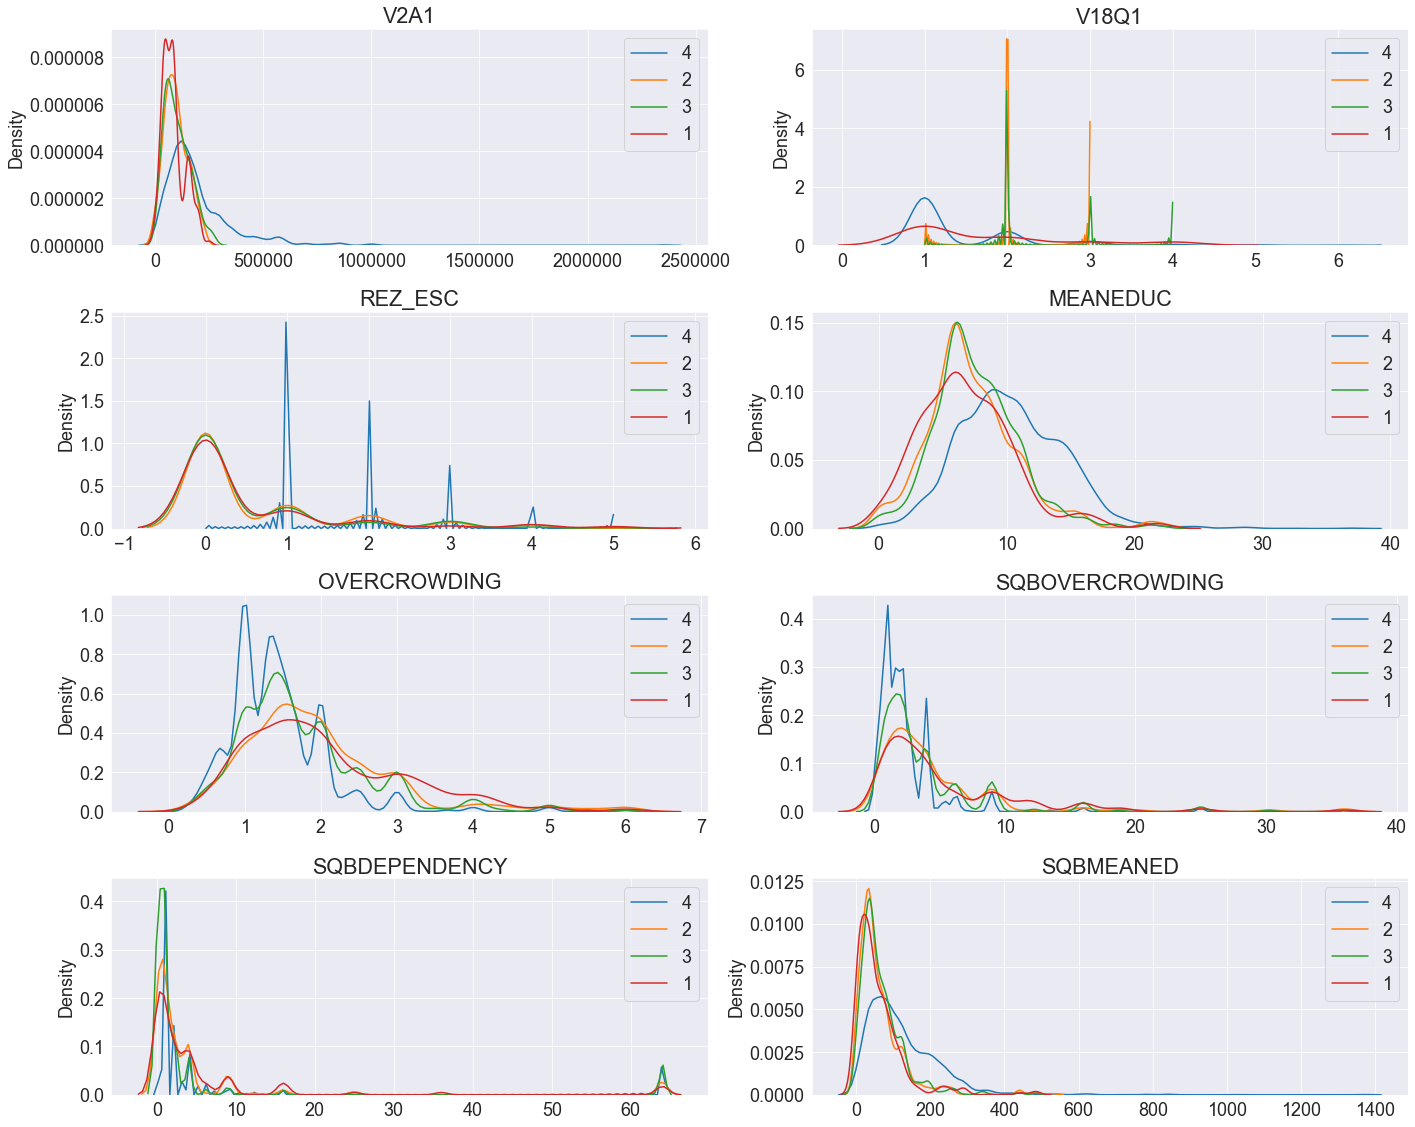

In [513]:
plt.figure(figsize = (20,16))
plt.rcParams['font.size'] = 18
for i, col in enumerate(train[flt].drop('Target',axis = 1)):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for target in train.Target.unique():
        sns.kdeplot(train.loc[train.Target == target, col].dropna(),ax = ax,label = target)
    plt.title(col.upper())
    plt.ylabel('Density')
    plt.tight_layout()

# plt.subplots_adjust(top = 2)

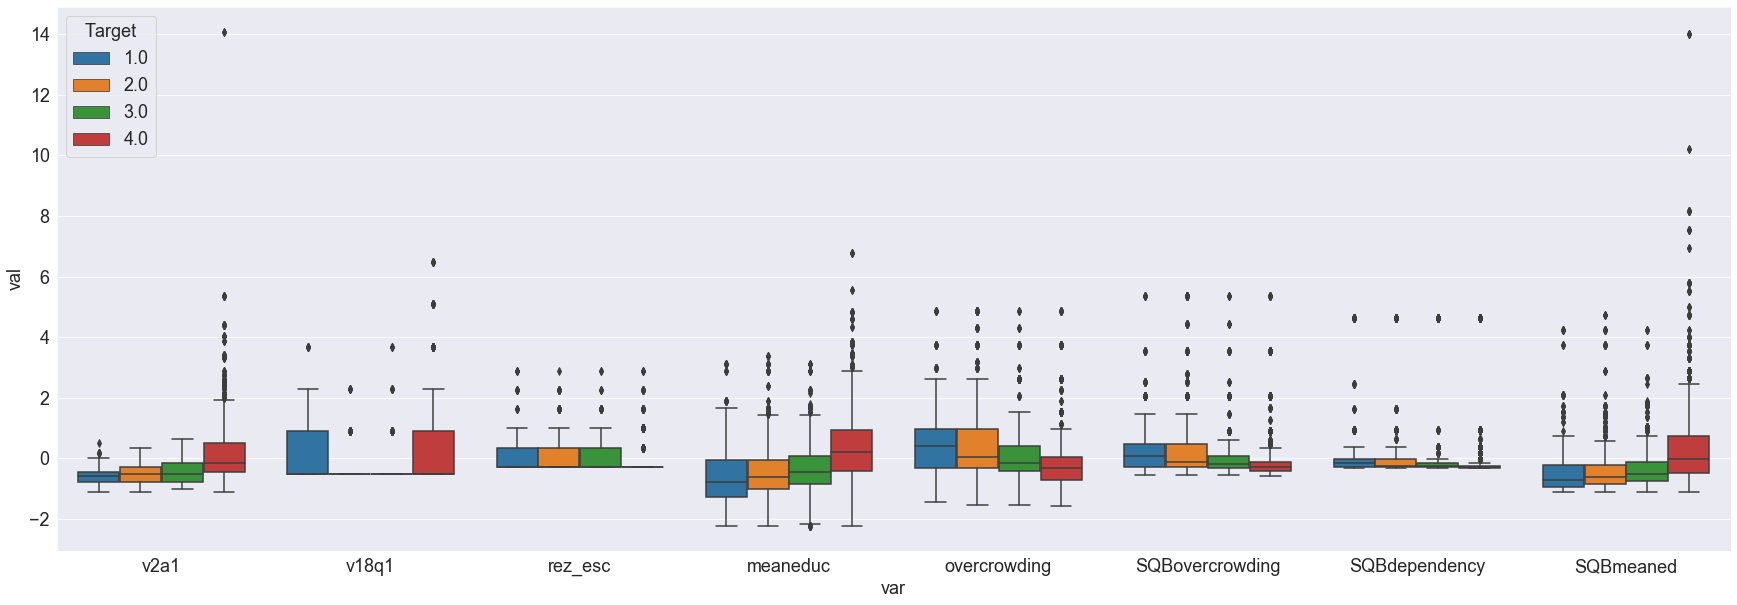

In [514]:
plt.figure(figsize=(30,10))
plt.rcParams['font.size'] = 18
tmp_std = (data[flt[:-1]] - data[flt[:-1]].mean()) / data[flt[:-1]].std()
tmp = pd.concat([tmp_std,data.Target],axis = 1)
tmp = pd.melt(tmp,id_vars = 'Target' , var_name = 'var' , value_name = 'val')

sns.boxplot(x = 'var' , y = 'val' , hue = 'Target' , data = tmp)

# plt.ylim(top = 6)

### Discrete variables

In [515]:
int_ = data.select_dtypes(np.int64).columns

In [516]:
int_

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'lugar6', 'area1', 'area2', 'age', 'SQBescolari', 'SQBage',
       'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'agesq'],
      dtype='object', length=129)

In [517]:
data[int_].nunique()

hacdor             2
rooms             15
hacapo             2
v14a               2
refrig             2
                  ..
SQBage            98
SQBhogar_total    13
SQBedjefe         22
SQBhogar_nin      11
agesq             98
Length: 129, dtype: int64

Text(0.5, 0, 'Nmber of unique values')

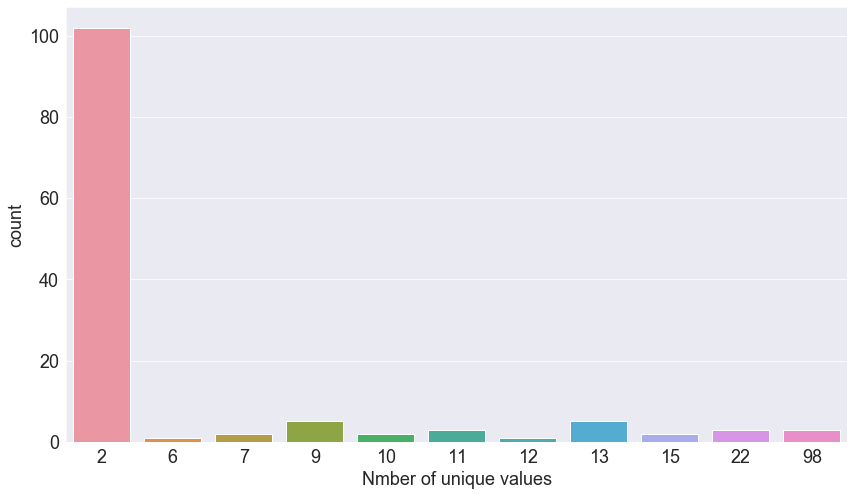

In [518]:
plt.figure(figsize = (14,8))
sns.countplot(x = data[int_].nunique())
plt.xlabel('Nmber of unique values')

### Fix target errors

In [519]:
tmp_tar = train.groupby('idhogar')['Target'].nunique().reset_index().rename(columns = {'Target' : 'Num_of_target'})

In [520]:
tmp_tar[tmp_tar.Num_of_target > 1]

,idhogar,Num_of_target
17,0172ab1d9,2
42,03f4e5f4d,2
54,0511912b6,2
92,078a0b6e2,2
122,09e25d616,2
...,...,...
2666,e65d4b943,2
2775,efd3aec61,2
2780,f006348ed,2
2866,f7b421c2c,2


The target of each household must be the same.

In [521]:
tmp_house = train.groupby('idhogar')['parentesco1'].sum().reset_index().rename(columns = {'parentesco1' : 'Num_of_head'})

In [522]:
tmp_house[tmp_house.Num_of_head != 1]

,idhogar,Num_of_head
38,03c6bdf85,0
114,09b195e7a,0
230,1367ab31d,0
331,1bc617b23,0
645,374ca5a19,0
1143,61c10e099,0
1268,6b1b2405f,0
1613,896fe6d3e,0
1867,a0812ef17,0
2027,ad687ad89,0


15 household don't have the head

In [523]:
tmp_house[tmp_house.Num_of_head != 1]['idhogar'].isin(tmp_tar[tmp_tar.Num_of_target > 1]['idhogar'])

38      False
114     False
230     False
331     False
645     False
1143    False
1268    False
1613    False
1867    False
2027    False
2068    False
2241    False
2251    False
2453    False
2807    False
Name: idhogar, dtype: bool

Not a problem. All Target of households that don't have head is the same.

In [524]:
tmp = train.groupby('idhogar')[['parentesco1','Target']].apply(lambda x: x.reset_index(drop = True))

In [525]:
tmp = tmp.reset_index().drop('level_1',axis =1)

In [526]:
tmp[tmp['parentesco1'] == 1]

,idhogar,parentesco1,Target
1,001ff74ca,1,4
3,003123ec2,1,2
6,004616164,1,2
8,004983866,1,3
10,005905417,1,2
...,...,...,...
9540,ff9343a35,1,4
9545,ff9d5ab17,1,4
9548,ffae4a097,1,4
9549,ffe90d46f,1,1


In [527]:
for i in tmp_tar[tmp_tar.Num_of_target > 1]['idhogar']:
    target = tmp[(tmp.idhogar == i) & (tmp.parentesco1 == 1)]['Target']
    data[:len(train)].loc[data[:len(train)]['idhogar'] == i, 'Target'] = target.values[0]

### Missing Data

In [528]:
missing = pd.DataFrame(data.drop('Target',axis = 1).isnull().sum().sort_values(ascending = False).reset_index())

In [529]:
missing.columns = ['Var' , 'Total_mis']

In [530]:
missing.head(10)

,Var,Total_mis
0,rez_esc,27581
1,v18q1,25468
2,v2a1,24263
3,SQBmeaned,36
4,meaneduc,36
5,public,0
6,sanitario2,0
7,sanitario1,0
8,coopele,0
9,noelec,0


In [531]:
# rez_esc
data[data.idhogar == '004983866']

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
6606,ID_1e320689c,NaN,0,5,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,8,NaN,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,004983866,1,1,0,2,1,0,8,8.0,0,0,0,1,0,0,0,0,0,2,1.0,1,0,0,0,0,0,0,1,2,0,0,1,0,0,0,1,0,59,64,3481,4,0,1,1.0,1.0,64.0,3481,3.0
6607,ID_5ad4372cd,NaN,0,5,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,7,2.0,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,004983866,1,1,0,2,1,0,8,8.0,0,0,0,1,0,0,0,0,0,2,1.0,1,0,0,0,0,0,0,1,2,0,0,1,0,0,0,1,0,16,49,256,4,0,1,1.0,1.0,64.0,256,3.0


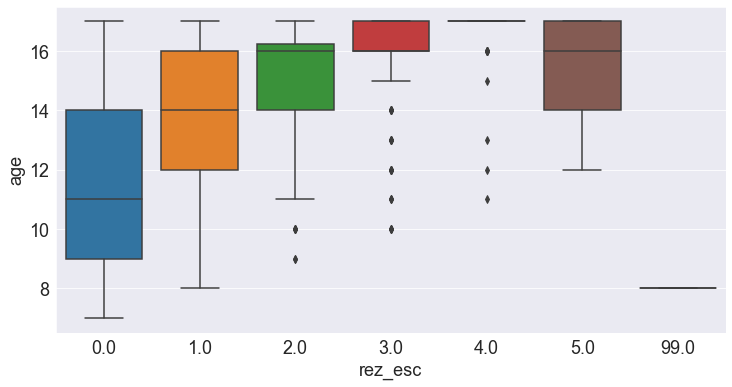

In [532]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'rez_esc', y = 'age',data = data)

In [533]:
data[data.rez_esc.notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [534]:
data[data.rez_esc.isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

In [535]:
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

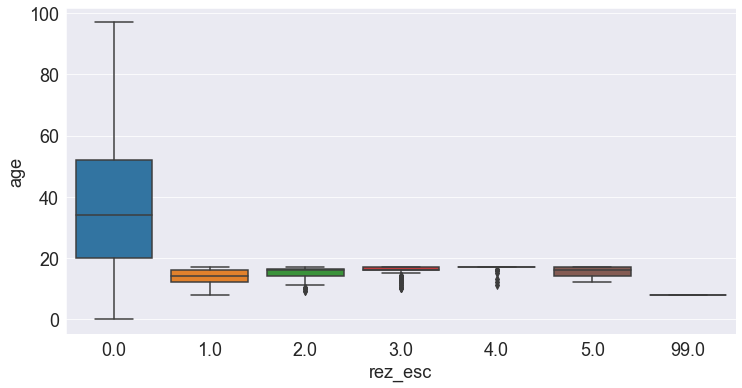

In [536]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'rez_esc', y = 'age',data = data)

In [537]:
data.rez_esc.isnull().sum()

1161

In [538]:
data['rez_esc_Miss'] = data.rez_esc.isnull()

In [539]:
data.rez_esc_Miss = data.rez_esc_Miss.astype(int)

In [540]:
data.rez_esc.fillna(train.rez_esc.median(),inplace = True)

In [541]:
# v18q1
data[data.v18q1.isnull()][['v18q1','v18q']]

,v18q1,v18q
0,NaN,0
2,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0
...,...,...
23851,NaN,0
23852,NaN,0
23853,NaN,0
23854,NaN,0


In [542]:
data[(data.v18q1.isnull()) & (data.v18q != 0)][['v18q1','v18q']]

,v18q1,v18q


In [543]:
data.v18q1.fillna(0,inplace = True)

In [544]:
data.v18q1.isnull().sum()

0

In [545]:
# v2a1
data[['v2a1','tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,190000.0,0,0,1,0,0
1,135000.0,0,0,1,0,0
2,NaN,1,0,0,0,0
3,180000.0,0,0,1,0,0
4,180000.0,0,0,1,0,0
...,...,...,...,...,...,...
23851,NaN,1,0,0,0,0
23852,NaN,1,0,0,0,0
23853,NaN,1,0,0,0,0
23854,NaN,1,0,0,0,0


In [546]:
tmp = pd.DataFrame(data['tipovivi1'].value_counts())

In [547]:
tmp.merge(data['tipovivi2'].value_counts() ,on=tmp.index).drop('key_0',axis = 1 , inplace = True)

In [548]:
def col_tipo():
    tmp = pd.DataFrame(data['tipovivi1'].value_counts())
    for i in [i for i in data if i.startswith('tipo')][1:]:
        tmp = tmp.merge(data[i].value_counts() ,on=tmp.index)
        tmp.drop('key_0',axis = 1 , inplace = True)
    tmp = tmp.iloc[1]
    tmp = pd.DataFrame(tmp).reset_index()
    return tmp

In [549]:
tmp = col_tipo()

In [550]:
tmp

,index,1
0,tipovivi1,12569
1,tipovivi2,3498
2,tipovivi3,5652
3,tipovivi4,597
4,tipovivi5,2822


Text(0, 0.5, 'Count')

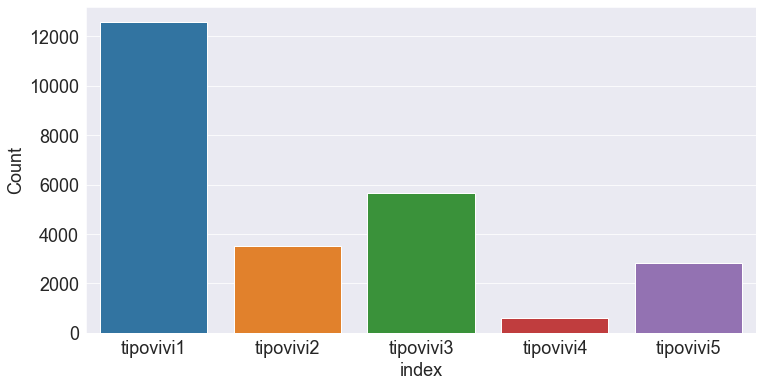

In [551]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'index' ,y = 1, data = tmp)
plt.ylabel('Count')

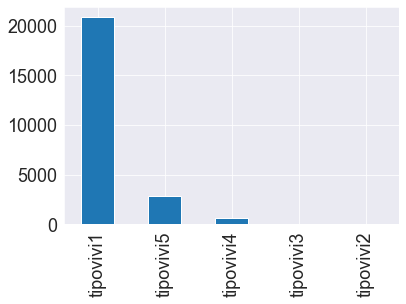

In [552]:
tmp = []
x = [i for i in data if i.startswith('tipo')]
for i in x:
    tmp.append(data[(data.v2a1.isnull()) & (data[i] == 1)][i].count())
tmp = pd.Series(tmp , index = x)
tmp.sort_values(ascending = False).plot.bar() 

In [553]:
data.loc[data.tipovivi1 == 1 , 'v2a1'] = 0

In [554]:
data['v2a1_Mis'] = data.v2a1.isnull()

In [555]:
data.v2a1_Mis = data.v2a1_Mis.astype(int)

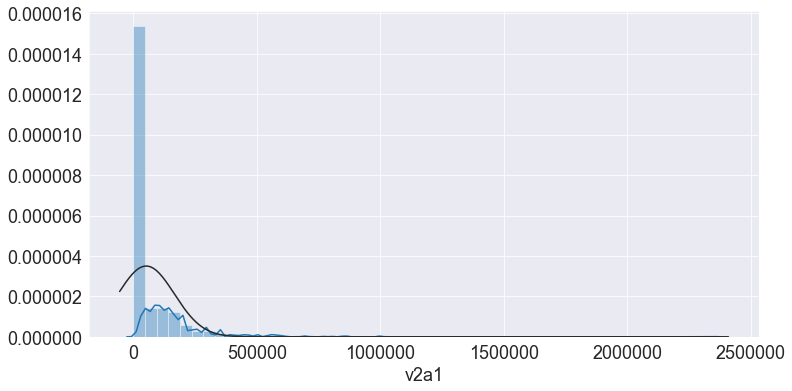

In [556]:
plt.figure(figsize = (12,6))
sns.distplot(data.dropna().v2a1 , fit = norm)

In [557]:
data.v2a1 = data.v2a1.fillna(train.v2a1.median())

In [558]:
# SQBmeaned , meaneduc
data.meaneduc.describe()

count    33377.000000
mean         9.178666
std          4.105725
min          0.000000
25%          6.000000
50%          8.666667
75%         11.500000
max         37.000000
Name: meaneduc, dtype: float64

In [559]:
data[data.meaneduc.isnull()][['edjefe','edjefa','instlevel1','Target']]

,edjefe,edjefa,instlevel1,Target
1291,0,10,0,4.0
1840,4,0,0,4.0
1841,4,0,0,4.0
2049,12,0,0,4.0
2050,12,0,0,4.0
4,0,11,0,NaN
535,0,11,0,NaN
536,0,12,0,NaN
537,0,12,0,NaN
2612,8,0,0,NaN


can fill na with mean , median or random sample i will impute with median of each Target

In [560]:
tmp = data.groupby('Target')['meaneduc'].median()[4]

In [561]:
data.loc[data.meaneduc.isnull() & data.Target.notnull(),'meaneduc'] = tmp 

In [562]:
data.meaneduc.fillna(train.meaneduc.median(),inplace = True)

In [563]:
tmp = data.groupby('Target')['SQBmeaned'].median()[4]

In [564]:
data.loc[data.SQBmeaned.isnull() & data.Target.notnull(),'SQBmeaned'] = tmp 

In [565]:
data.SQBmeaned.fillna(train.SQBmeaned.median(),inplace = True)

In [566]:
data.isnull().sum().sort_values()

Id                  0
parentesco10        0
parentesco11        0
parentesco12        0
idhogar             0
                ...  
sanitario2          0
sanitario3          0
abastaguano         0
v2a1_Mis            0
Target          23856
Length: 145, dtype: int64

### Outliers

- ### continuous variables

In [567]:
con_var = list(flt)

In [568]:
con_var.remove('Target')

In [569]:
data[con_var].head()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,0.0,0.0,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,0.0,12.0,1.000000,1.000000,64.0,144.0
2,0.0,0.0,0.0,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,0.0,11.0,1.333333,1.777778,1.0,121.0


In [570]:
data[con_var].describe()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
count,3.341300e+04,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000
mean,6.041218e+04,0.324335,0.075899,9.178623,1.631687,3.474577,4.094081,101.085566
std,1.129740e+05,0.677188,0.681139,4.103529,0.901221,6.053864,12.939225,90.421057
min,0.000000e+00,0.000000,0.000000,0.000000,0.142857,0.020408,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,6.000000,1.000000,1.000000,0.111111,36.000000
50%,0.000000e+00,0.000000,0.000000,8.666667,1.500000,2.250000,0.444444,75.111115
75%,1.250000e+05,0.000000,0.000000,11.500000,2.000000,4.000000,1.777778,132.250000
max,2.852700e+06,6.000000,99.000000,37.000000,13.000000,169.000000,64.000000,1369.000000


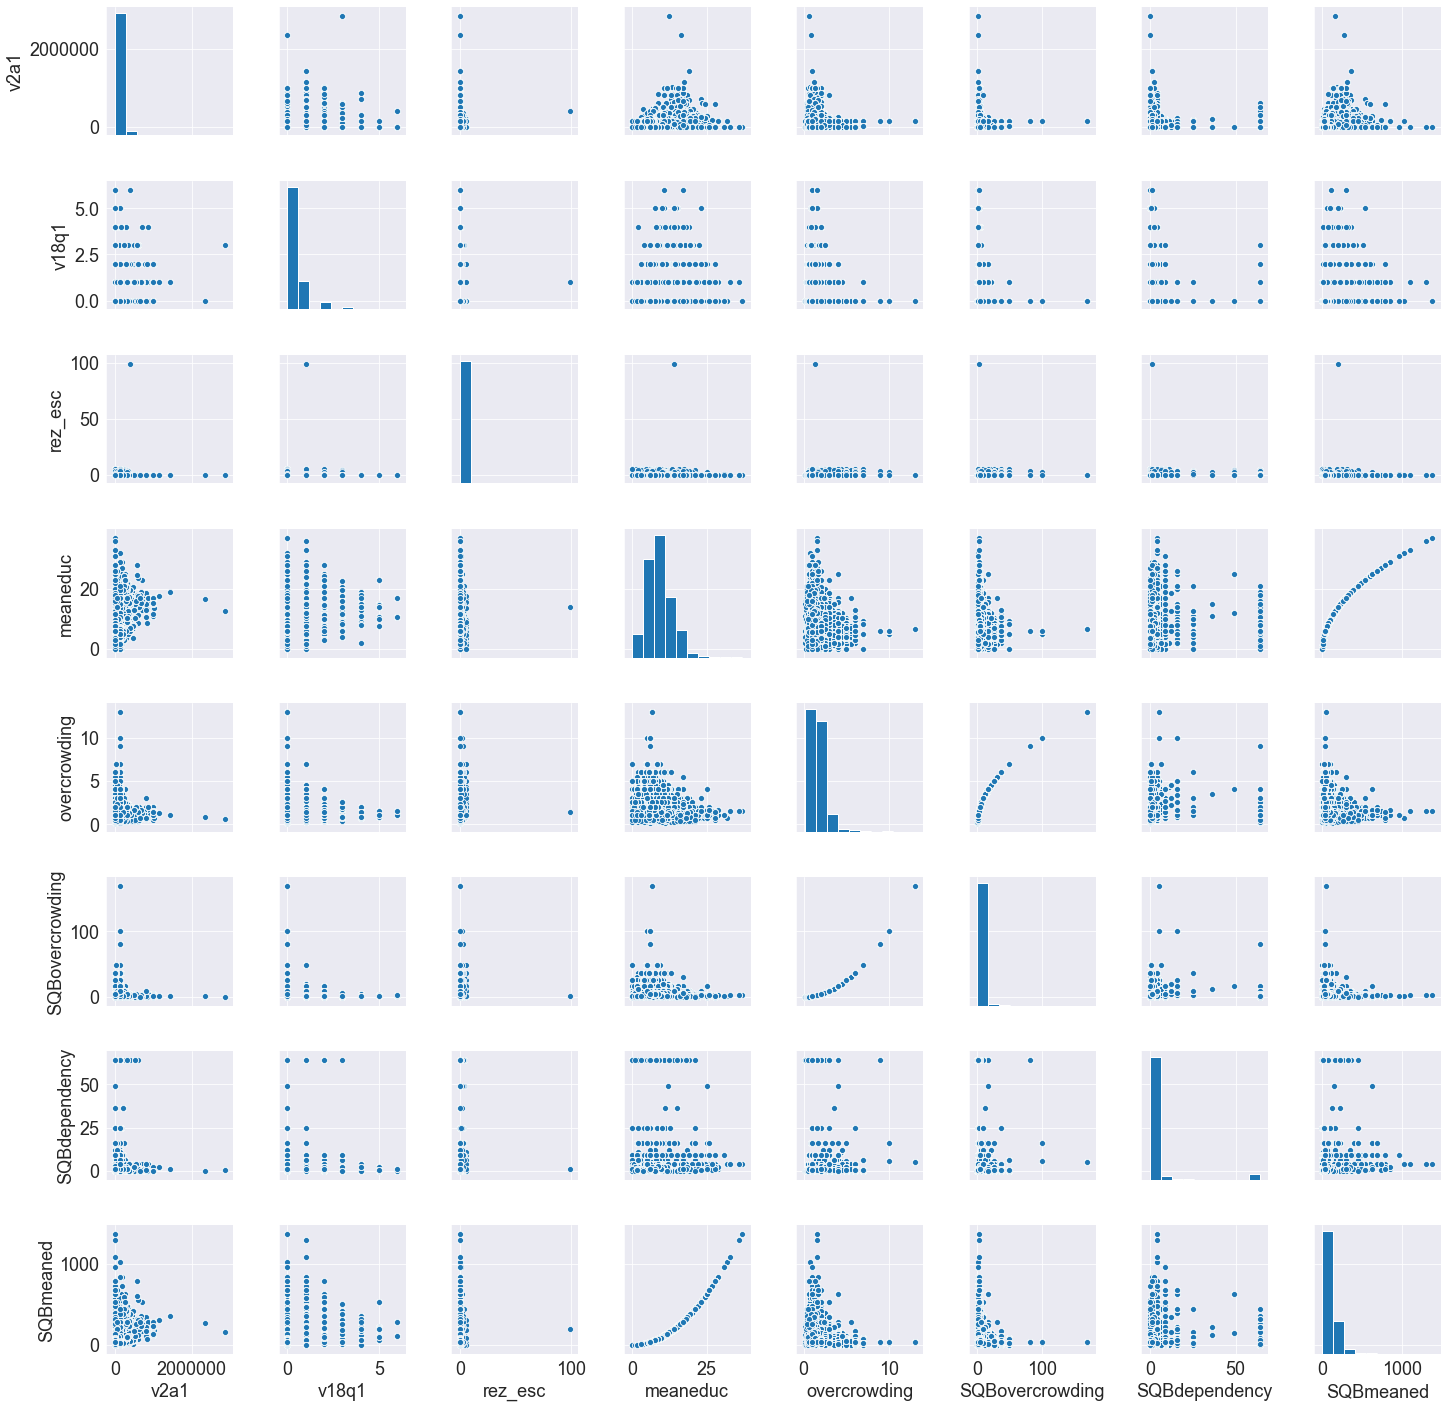

In [571]:
sns.pairplot(data[con_var])

all variables is very skewed

In [572]:
def find_skewed_boundaries(df, var, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[var].quantile(0.75) - df[var].quantile(0.25)

    lower_boundary = df[var].quantile(0.25) - (IQR * distance)
    upper_boundary = df[var].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [573]:
# up_list = []
# low_list = []
for i in con_var:
    if i == 'meaneduc':
        up , low = find_skewed_boundaries(data , i , 1.5)
        print(f'Upper boundary and Lower boundary of {i} are {up, low}')
#         for x in data[i]:
#             if x > up:
#                 up_list.append(x)
#             elif x < low:
#                 low_list.appemd(x)
#         if up_list is not None:
#             up_list = set(up_list.sort())
#             print(f'Up outliers are {up_list}')
#         elif low_list is not None:
#             low_list = set(low_list.sort())
#             pprint(f'Up outliers are {low_list}')
#         up_list.clear()
#         low_list.clear()
    else:
        upper , lower = find_skewed_boundaries(data , i , 3)
        print(f'Upper boundary and Lower boundary of {i} are {upper, lower}')
#         for x in data[i]:
#             if x > upper:
#                 up_list.append(x)
#             elif x < low:
#                 low_list.appemd(x)
#         if up_list is not None:
#             print(up_list)
#             up_list = set(up_list.sort())
#             print(f'Up outliers are {up_list}')
#         elif low_list is not None:
#             low_list = set(low_list.sort())
#             pprint(f'Up outliers are {low_list}')
#         up_list.clear()
#         low_list.clear()
    

Upper boundary and Lower boundary of v2a1 are (500000.0, -375000.0)
Upper boundary and Lower boundary of v18q1 are (0.0, 0.0)
Upper boundary and Lower boundary of rez_esc are (0.0, 0.0)
Upper boundary and Lower boundary of meaneduc are (19.75, -2.25)
Upper boundary and Lower boundary of overcrowding are (5.0, -2.0)
Upper boundary and Lower boundary of SQBovercrowding are (13.0, -8.0)
Upper boundary and Lower boundary of SQBdependency are (6.77777824, -4.888889219999999)
Upper boundary and Lower boundary of SQBmeaned are (421.0, -252.75)


In [574]:
data[data.v2a1 > 1300000 ]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc_Miss,v2a1_Mis
4441,ID_cb5f684a6,2353477.0,0,9,0,1,1,0,0.0,0,2,2,0,3,3,0,5,5,2,5,19,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,563cc81b7,0,2,0,2,0,0,14,16.5,0,0,0,0,0,0,0,0,1,6,0.833333,0,1,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,51,361,2601,4,0,0,0.694444,0.00,272.25,2601,4.0,0,0
4442,ID_15c481789,2353477.0,0,9,0,1,1,0,0.0,0,2,2,0,3,3,0,5,5,2,5,14,0.0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,563cc81b7,0,2,0,2,0,0,14,16.5,0,0,0,0,0,0,0,1,0,6,0.833333,0,1,0,0,0,0,0,1,2,1,0,0,0,0,0,1,0,57,196,3249,4,0,0,0.694444,0.00,272.25,3249,4.0,0,0
496,ID_94fef7ba3,2852700.0,0,12,0,1,1,1,3.0,0,1,1,0,2,2,0,3,3,3,3,11,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d45810866,1,2,0,3,.5,0,11,12.5,0,0,0,0,1,0,0,0,0,5,0.600000,0,0,1,0,0,1,0,1,3,1,0,0,0,0,0,1,0,53,121,2809,9,0,1,0.360000,0.25,156.25,2809,NaN,0,0
497,ID_906c3c6d5,2852700.0,0,12,0,1,1,1,3.0,0,1,1,0,2,2,0,3,3,3,3,14,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d45810866,1,2,0,3,.5,0,11,12.5,0,0,0,0,0,0,0,1,0,5,0.600000,0,0,1,0,0,1,0,1,3,1,0,0,0,0,0,1,0,22,196,484,9,0,1,0.360000,0.25,156.25,484,NaN,0,0
498,ID_050f8448a,2852700.0,0,12,0,1,1,1,3.0,0,1,1,0,2,2,0,3,3,3,3,10,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,d45810866,1,2,0,3,.5,0,11,12.5,0,0,0,1,0,0,0,0,0,5,0.600000,0,0,1,0,0,1,0,1,3,1,0,0,0,0,0,1,0,16,100,256,9,0,1,0.360000,0.25,156.25,256,NaN,0,0
1444,ID_8bc4e619a,1426350.0,0,9,0,1,1,1,1.0,2,1,3,0,1,1,2,2,4,4,4,0,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,e052901f9,2,2,0,4,1,0,17,19.0,1,0,0,0,0,0,0,0,0,4,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,1,0,1,16,0,4,1.000000,1.00,361.00,1,NaN,0,0
1445,ID_fd2143b9f,1426350.0,0,9,0,1,1,1,1.0,2,1,3,0,1,1,2,2,4,4,4,21,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,e052901f9,2,2,0,4,1,0,17,19.0,0,0,0,0,0,0,0,0,1,4,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,35,441,1225,16,0,4,1.000000,1.00,361.00,1225,NaN,0,0
1446,ID_745af13cf,1426350.0,0,9,0,1,1,1,1.0,2,1,3,0,1,1,2,2,4,4

In [575]:
data[data['SQBmeaned'] > 421 ][['meaneduc','SQBmeaned']]

,meaneduc,SQBmeaned
11,23.0,529.0
12,23.0,529.0
455,23.0,529.0
456,23.0,529.0
563,21.0,441.0
...,...,...
22318,21.0,441.0
22637,23.0,529.0
22638,23.0,529.0
22639,23.0,529.0


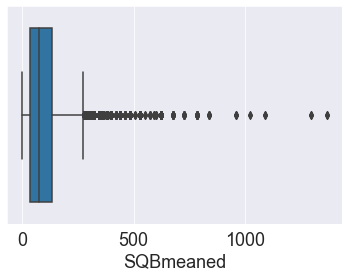

In [576]:
sns.boxplot(data['SQBmeaned'])

In [577]:
sq = np.square(data.meaneduc)

In [578]:
data[data.SQBmeaned - sq > 0][['meaneduc' , 'SQBmeaned']]

,meaneduc,SQBmeaned
27,6.666666,44.444443
28,6.666666,44.444443
29,6.666666,44.444443
80,14.333333,205.444440
81,14.333333,205.444440
...,...,...
23804,5.666666,32.111111
23805,5.666666,32.111111
23827,1.666667,2.777778
23828,1.666667,2.777778


In [579]:
data[:len(train)].isnull().sum().sort_values()

Id              0
parentesco10    0
parentesco11    0
parentesco12    0
idhogar         0
               ..
sanitario1      0
sanitario2      0
sanitario3      0
eviv2           0
v2a1_Mis        0
Length: 145, dtype: int64

### Feature Aggregation

In [580]:
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc_Miss,v2a1_Mis
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0,10,0,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4.0,0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,0,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4.0,0,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,0,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4.0,0,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11,0,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4.0,0,0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1,11,0,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4.0,0,0


In [581]:
ind_var = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc_Miss','rez_esc', 'escolari', 'age']

In [582]:
id_ = ['Id', 'idhogar', 'Target']
ind = data[id_ + ind_var]

In [583]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          male                                female                          \
           min max sum count       std range_    min max sum count       std   
idhogar                                                                        
000a08204    0   1   2     3  0.577350      1      0   1   1     3  0.577350   
000bce7c4    0   1   1     2  0.707107      1      0   1   1     2  0.707107   
001845fb0    0   1   2     4  0.577350      1      0   1   2     4  0.577350   
001ff74ca    0   0   0     2  0.000000      0      1   1   2     2  0.000000   
003123ec2    0   1   3     4  0.500000      1      0   1   1     4  0.500000   

                 estadocivil1                                estadocivil2      \
          range_          min max sum count       std range_          min max   
idhogar                                                                         
000a08204      1            0   1   1     3  0.577350      1            0   1   
000bce7c4      1            0   0   0     2  0.000000      0            0   0   
001845fb0      1            0   0   0     4  0.000000      0            0   1   
001ff74ca      0            0   1   1     2  0.707107      1            0   0   
003123ec2      1            0   1   2     4  0.577350      1            0   1   

                                    estadocivil3                            \
          sum count      std range_          min max sum count  std range_   
idhogar                                                                      
000a08204   2     3  0.57735      1            0   0   0     3  0.0      0   
000bce7c4   0     2  0.00000      0            1   1   2     2  0.0      0   
001845fb0   2     4  0.57735      1            0   0   0     4  0.0      0   
001ff74ca   0     2  0.00000      0            0   0   0     2  0.0      0   
003123ec2   2     4  0.57735      1            0   0   0     4  0.0      0   

          estadocivil4                           estadocivil5                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   1   1     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                           estadocivil6                            \
                std range_          min max sum count  std range_   
idhogar                                                             
000a08204  0.000000      0            0   0   0     3  0.0      0   
000bce7c4  0.000000      0            0   0   0     2  0.0      0   
001845fb0  0.000000      0            0   0   0     4  0.0      0   
001ff74ca  0.707107      1            0   0   0     2  0.0      0   
003123ec2  0.000000      0            0   0   0     4  0.0      0   

          estadocivil7                               parentesco1          \
                   min max sum count      std range_         min max sum   
idhogar                                                                    
000a08204            0   0   0     3  0.00000   

In [584]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,male-min,male-max,male-sum,male-count,male-std,male-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,parentesco3-count,parentesco3-std,parentesco3-range_,parentesco4-min,parentesco4-max,parentesco4-sum,parentesco4-count,parentesco4-std,parentesco4-range_,parentesco5-min,parentesco5-max,parentesco5-sum,parentesco5-count,parentesco5-std,parentesco5-range_,parentesco6-min,parentesco6-max,parentesco6-sum,parentesco6-count,parentesco6-std,parentesco6-range_,parentesco7-min,parentesco7-max,parentesco7-sum,parentesco7-count,parentesco7-std,parentesco7-range_,parentesco8-min,parentesco8-max,parentesco8-sum,parentesco8-count,parentesco8-std,parentesco8-range_,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco9-count,parentesco9-std,parentesco9-range_,parentesco10-min,parentesco10-max,parentesco10-sum,parentesco10-count,parentesco10-std,parentesco10-range_,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco11-count,parentesco11-std,parentesco11-range_,parentesco12-min,parentesco12-max,parentesco12-sum,parentesco12-count,parentesco12-std,parentesco12-range_,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel1-count,instlevel1-std,instlevel1-range_,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-count,instlevel2-std,instlevel2-range_,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-count,instlevel3-std,instlevel3-range_,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-count,instlevel4-std,instlevel4-range_,instlevel5-min,instlevel5-max,instlevel5-sum,instlevel5-count,instlevel5-std,instlevel5-range_,instlevel6-min,instlevel6-max,instlevel6-sum,instlevel6-count,instlevel6-std,instlevel6-range_,instlevel7-min,instlevel7-max,instlevel7-sum,instlevel7-count,instlevel7-std,instlevel7-range_,instlevel8-min,instlevel8-max,instlevel8-sum,instlevel8-count,instlevel8-std,instlevel8-range_,instlevel9-min,instlevel9-max,instlevel9-sum,instlevel9-count,instlevel9-std,instlevel9-range_,mobilephone-min,mobilephone-max,mobilephone-sum,mobilephone-count,mobilephone-std,mobilephone-range_,rez_esc_Miss-min,rez_esc_Miss-max,rez_esc_Miss-sum,rez_esc_Miss-count,rez_esc_Miss-std,rez_esc_Miss-range_,rez_esc-min,rez_esc-max,rez_esc-sum,rez_esc-count,rez_esc-std,rez_esc-range_,escolari-min,escolari-max,escolari-sum,escolari-count,escolari-std,escolari-range_,age-min,age-max,age-sum,age-count,age-std,age-range_
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,0.000000,0,0,1,2,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,2,3,0.57735,1,0,0,0,3,0.0,0,0,0,0,3,0.0,0,0,0,0,3,0.000000,0,0,0,0,3,0.0,0,0,0,0,3,0.00000,0,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,1,1,3,0.577350,1,0,0,0,3,0.0,0,0,0,

In [585]:
data_merge = pd.concat([data.set_index('idhogar') , ind_agg] ,axis = 1 , join= 'inner').reset_index()

In [586]:
data_merge.head()

,idhogar,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,rez_esc_Miss,v2a1_Mis,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,male-min,male-max,male-sum,male-count,male-std,male-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,parentesco3-count,parentesco3-std,parentesco3-range_,parentesco4-min,parentesco4-max,parentesco4-sum,parentesco4-count,parentesco4-std,parentesco4-range_,parentesco5-min,parentesco5-max,parentesco5-sum,parentesco5-count,parentesco5-std,parentesco5-range_,parentesco6-min,parentesco6-max,parentesco6-sum,parentesco6-count,parentesco6-std,parentesco6-range_,parentesco7-min,parentesco7-max,parentesco7-sum,parentesco7-count,parentesco7-std,parentesco7-range_,parentesco8-min,parentesco8-max,parentesco8-sum,parentesco8-count,parentesco8-std,parentesco8-range_,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco9-count,parentesco9-std,parentesco9-range_,parentesco10-min,parentesco10-max,parentesco10-sum,parentesco10-count,parentesco10-std,parentesco10-range_,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco11-count,parentesco11-std,parentesco11-range_,parentesco12-min,parentesco12-max,parentesco12-sum,parentesco12-count,parentesco12-std,parentesco12-range_,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel1-count,instlevel1-std,instlevel1-range_,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-count,instlevel2-std,instlevel2-range_,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-count,instlevel3-std,instlevel3-range_,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-count,instlevel4-std,instlevel4-range_,i

In [587]:
data_merge.isnull().sum().sort_values().tail(50)

instlevel7              0
tipovivi5               0
bedrooms                0
overcrowding            0
tipovivi4               0
tipovivi3               0
tipovivi1               0
parentesco9             0
parentesco11            0
instlevel9              0
parentesco10            0
tipovivi2               0
estadocivil1-std     1328
estadocivil3-std     1328
age-std              1328
rez_esc_Miss-std     1328
estadocivil2-std     1328
dis-std              1328
male-std             1328
parentesco9-std      1328
rez_esc-std          1328
escolari-std         1328
parentesco7-std      1328
parentesco10-std     1328
parentesco6-std      1328
parentesco2-std      1328
mobilephone-std      1328
instlevel4-std       1328
parentesco3-std      1328
parentesco1-std      1328
instlevel2-std       1328
instlevel5-std       1328
parentesco8-std      1328
estadocivil7-std     1328
instlevel6-std       1328
instlevel1-std       1328
parentesco4-std      1328
estadocivil6-std     1328
instlevel7-s

In [588]:
data_merge = data_merge.drop('Target' , axis = 1).fillna(-1)

In [589]:
data_merge.isnull().sum().any()

False

In [590]:
data_merge = pd.concat([data_merge.set_index('idhogar') , data.set_index('idhogar').Target] ,axis = 1 , join= 'inner').reset_index()

In [591]:
data_merge.shape

(33413, 367)

### creat ordinal variables

In [592]:
bool_ = []
for i in data_merge.columns:
    if data_merge[i].nunique() == 2:
        bool_.append(i)

In [593]:
bool_

['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'v18q',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisocemento',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'etecho1',
 'etecho2',
 'etecho3',
 'eviv1',
 'eviv2',
 'eviv3',
 'dis',
 'male',
 'female',
 'estadocivil1',
 'estadocivil2',
 'estadocivil3',
 'estadocivil4',
 'estadocivil5',
 'estadocivil6',
 'estadocivil7',
 'parentesco1',
 'parentesco2',
 'parentesco3',
 'parentesco4',
 'parentesco5',
 'pare

In [594]:
data_merge[(data_merge.hacdor == 0) & (data_merge.hacapo == 0)]

,idhogar,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,rez_esc_Miss,v2a1_Mis,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,dis-std,dis-range_,male-min,male-max,male-sum,male-count,male-std,male-range_,female-min,female-max,female-sum,female-count,female-std,female-range_,estadocivil1-min,estadocivil1-max,estadocivil1-sum,estadocivil1-count,estadocivil1-std,estadocivil1-range_,estadocivil2-min,estadocivil2-max,estadocivil2-sum,estadocivil2-count,estadocivil2-std,estadocivil2-range_,estadocivil3-min,estadocivil3-max,estadocivil3-sum,estadocivil3-count,estadocivil3-std,estadocivil3-range_,estadocivil4-min,estadocivil4-max,estadocivil4-sum,estadocivil4-count,estadocivil4-std,estadocivil4-range_,estadocivil5-min,estadocivil5-max,estadocivil5-sum,estadocivil5-count,estadocivil5-std,estadocivil5-range_,estadocivil6-min,estadocivil6-max,estadocivil6-sum,estadocivil6-count,estadocivil6-std,estadocivil6-range_,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-count,estadocivil7-std,estadocivil7-range_,parentesco1-min,parentesco1-max,parentesco1-sum,parentesco1-count,parentesco1-std,parentesco1-range_,parentesco2-min,parentesco2-max,parentesco2-sum,parentesco2-count,parentesco2-std,parentesco2-range_,parentesco3-min,parentesco3-max,parentesco3-sum,parentesco3-count,parentesco3-std,parentesco3-range_,parentesco4-min,parentesco4-max,parentesco4-sum,parentesco4-count,parentesco4-std,parentesco4-range_,parentesco5-min,parentesco5-max,parentesco5-sum,parentesco5-count,parentesco5-std,parentesco5-range_,parentesco6-min,parentesco6-max,parentesco6-sum,parentesco6-count,parentesco6-std,parentesco6-range_,parentesco7-min,parentesco7-max,parentesco7-sum,parentesco7-count,parentesco7-std,parentesco7-range_,parentesco8-min,parentesco8-max,parentesco8-sum,parentesco8-count,parentesco8-std,parentesco8-range_,parentesco9-min,parentesco9-max,parentesco9-sum,parentesco9-count,parentesco9-std,parentesco9-range_,parentesco10-min,parentesco10-max,parentesco10-sum,parentesco10-count,parentesco10-std,parentesco10-range_,parentesco11-min,parentesco11-max,parentesco11-sum,parentesco11-count,parentesco11-std,parentesco11-range_,parentesco12-min,parentesco12-max,parentesco12-sum,parentesco12-count,parentesco12-std,parentesco12-range_,instlevel1-min,instlevel1-max,instlevel1-sum,instlevel1-count,instlevel1-std,instlevel1-range_,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-count,instlevel2-std,instlevel2-range_,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-count,instlevel3-std,instlevel3-range_,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-count,instlevel4-std,instlevel4-range_,instleve

In [595]:
tmp = [i for i in data if i.startswith('pared')]

data_merge['pared'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)

data_merge.drop(tmp , axis = 1 , inplace = True)

In [596]:
tmp = [i for i in data if i.startswith('piso')]

data_merge['piso'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)

data_merge.drop(tmp , axis = 1 , inplace = True)

In [597]:
tmp = [i for i in data if i.startswith('tech')]

data_merge['tech'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [598]:
tmp = [i for i in data if i.startswith('abast')]

data_merge['abast'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [599]:
tmp = [i for i in data if i.startswith('sanitario')]

data_merge['sanitario'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [600]:
tmp = [i for i in data if i.startswith('energco')]

data_merge['energco'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [601]:
tmp = [i for i in data if i.startswith('elimbas')]

data_merge['elimbas'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [602]:
tmp = [i for i in data if i.startswith('epar')]

data_merge['epar'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [603]:
tmp = [i for i in data if i.startswith('etech')]

data_merge['etech'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [604]:
tmp = [i for i in data if i.startswith('eviv')]

data_merge['eviv'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [605]:
tmp = [i for i in data if i.startswith('estado')]

data_merge['estado'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [606]:
tmp = [i for i in data if i.startswith('parentes')]

data_merge['parentes'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [607]:
tmp = [i for i in data if i.startswith('instlevel')]

data_merge['instlevel'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [608]:
tmp = [i for i in data if i.startswith('tipovi')]

data_merge['tipovi'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [609]:
tmp = [i for i in data if i.startswith('lugar')]

data_merge['lugar'] = np.argmax(np.array(data_merge[tmp]),
                           axis = 1)
data_merge.drop(tmp , axis = 1 , inplace = True)

In [610]:
data_merge.isnull().sum().sort_values()

idhogar                    0
instlevel1-sum             0
instlevel1-max             0
instlevel1-min             0
parentesco12-range_        0
                       ...  
estadocivil2-range_        0
estadocivil2-std           0
estadocivil3-std           0
lugar                      0
Target                 23856
Length: 298, dtype: int64

### Rare labels

In [611]:
def plot_rare(df, typ):
    tmp = pd.DataFrame((data_merge[:len(train)][typ].value_counts()/data_merge[:len(train)][typ].count()).reset_index())
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x = 'index', y = typ , data = tmp , order = tmp['index'] , palette = "inferno")
    ax.axhline(y=0.03, color='black')
    plt.tight_layout()

In [612]:
int_ = data_merge.select_dtypes(np.int64).columns

In [613]:
int_plus = []
for i in int_:
    if data_merge[i].nunique() > 2:
        int_plus.append(i)

In [614]:
int_plus

['rooms',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'hhsize',
 'hogar_nin',
 'hogar_adul',
 'hogar_mayor',
 'hogar_total',
 'bedrooms',
 'qmobilephone',
 'age',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'agesq',
 'v18q-sum',
 'v18q-count',
 'dis-sum',
 'dis-count',
 'male-sum',
 'male-count',
 'female-sum',
 'female-count',
 'estadocivil1-sum',
 'estadocivil1-count',
 'estadocivil2-sum',
 'estadocivil2-count',
 'estadocivil3-sum',
 'estadocivil3-count',
 'estadocivil4-sum',
 'estadocivil4-count',
 'estadocivil5-sum',
 'estadocivil5-count',
 'estadocivil6-sum',
 'estadocivil6-count',
 'estadocivil7-sum',
 'estadocivil7-count',
 'parentesco1-count',
 'parentesco2-count',
 'parentesco3-sum',
 'parentesco3-count',
 'parentesco4-sum',
 'parentesco4-count',
 'parentesco5-sum',
 'parentesco5-count',
 'parentesco6-sum',
 'parentesco6-count',
 'parentesco7-sum',
 'parentesco7-count',
 

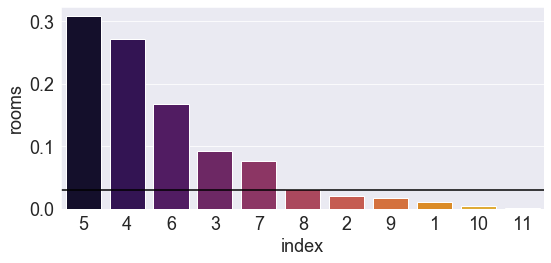

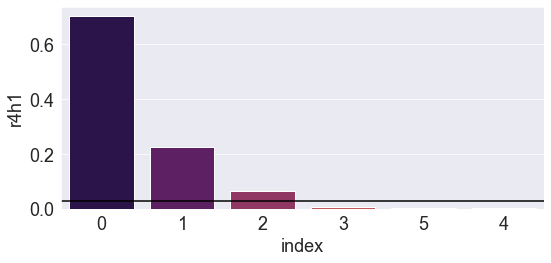

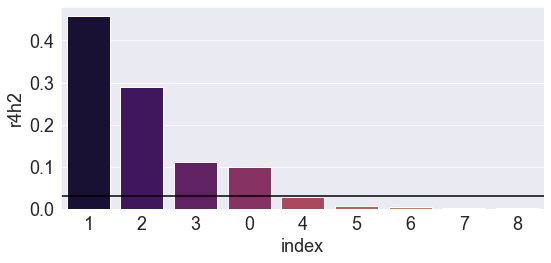

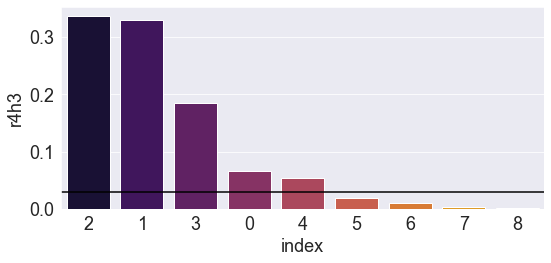

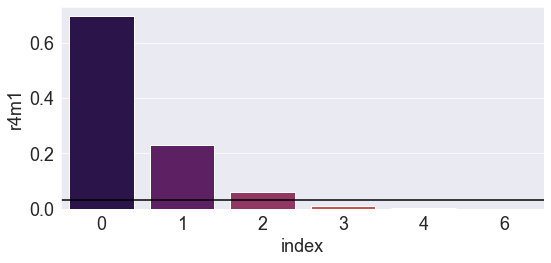

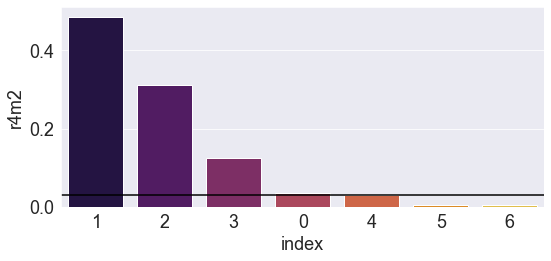

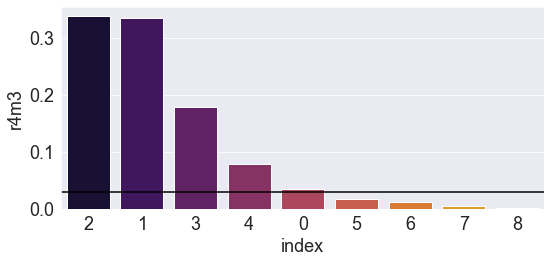

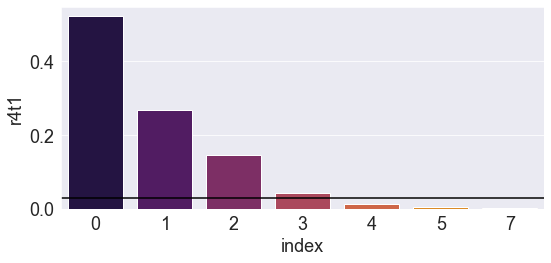

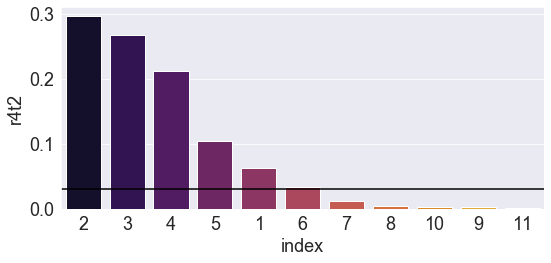

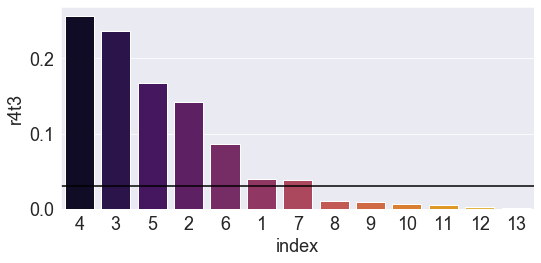

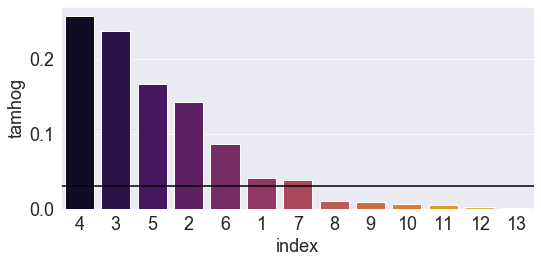

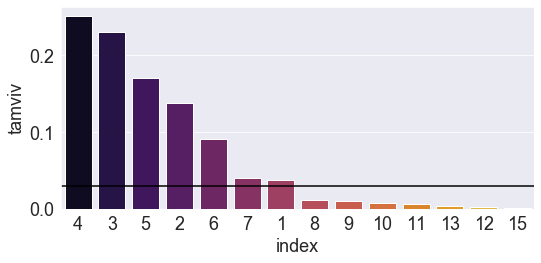

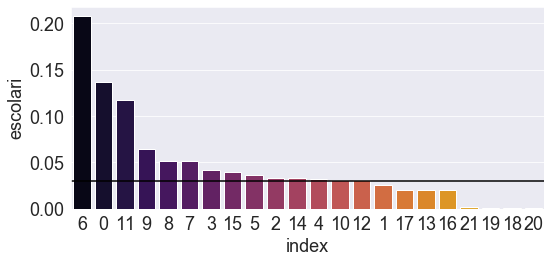

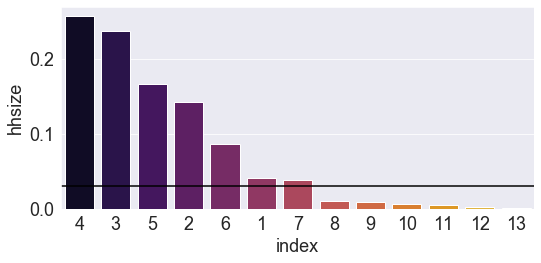

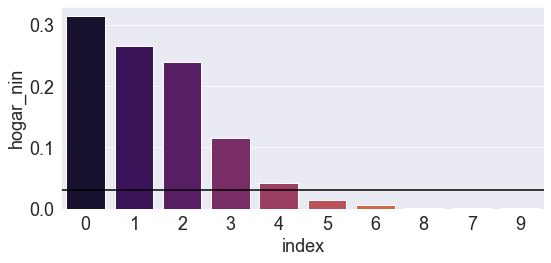

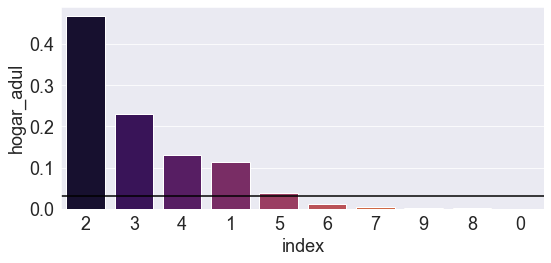

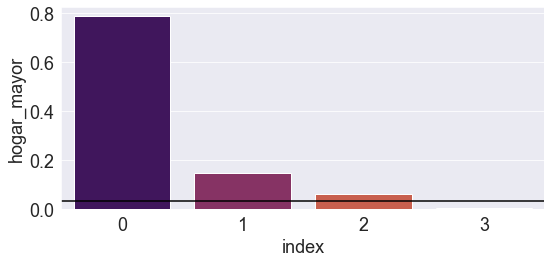

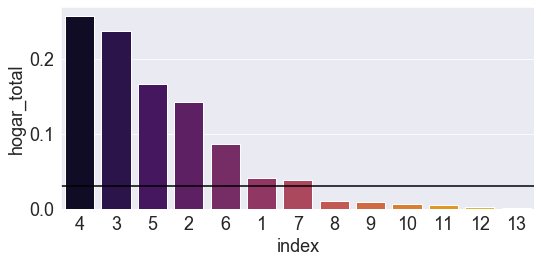

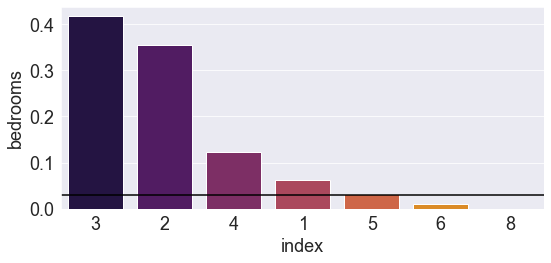

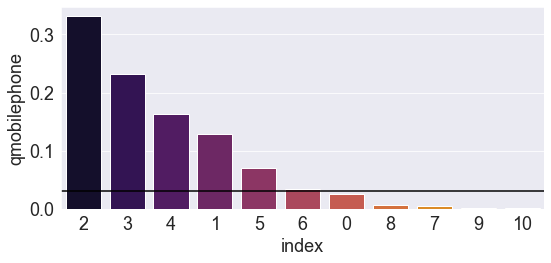

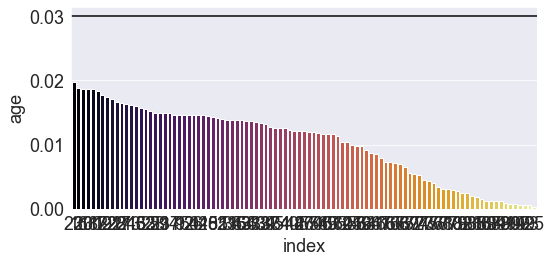

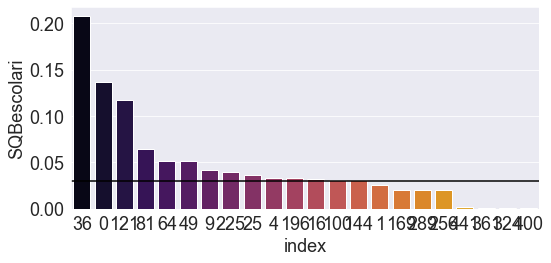

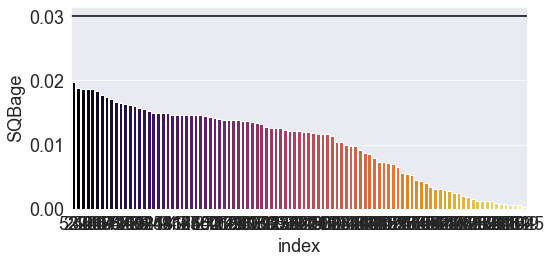

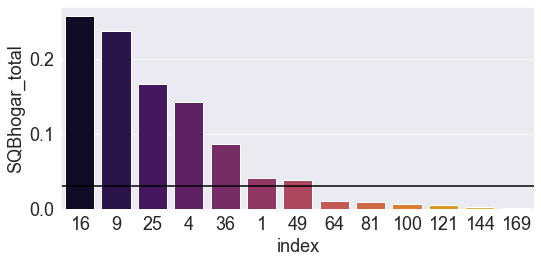

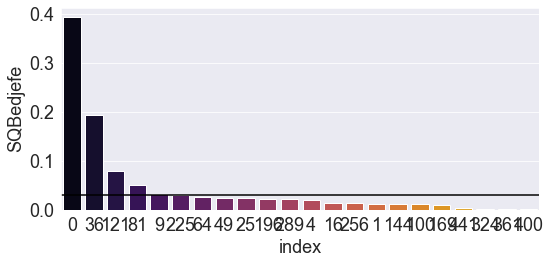

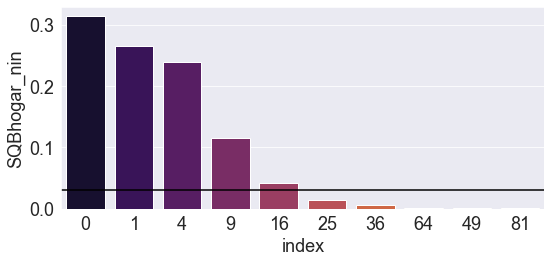

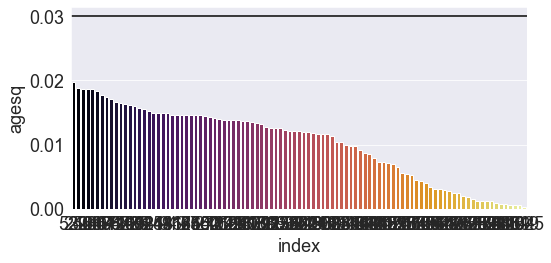

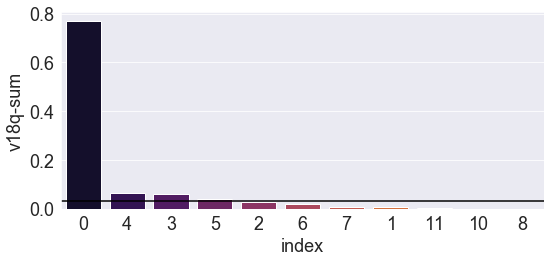

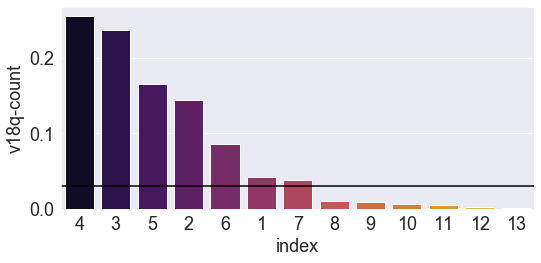

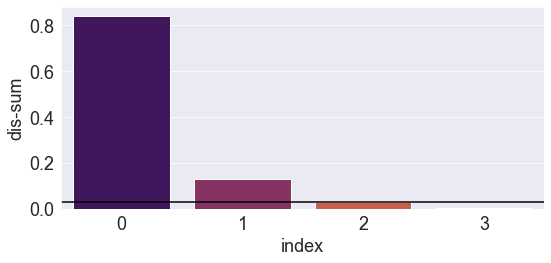

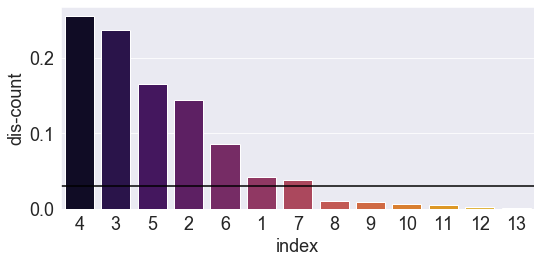

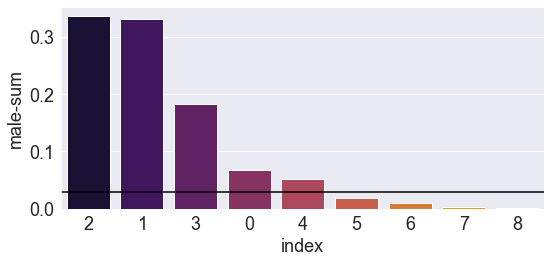

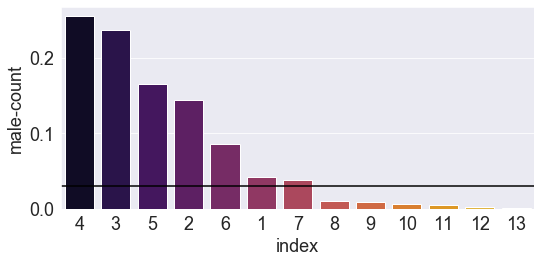

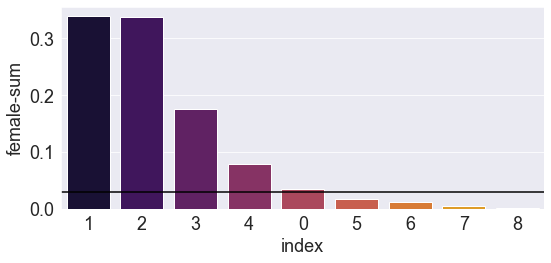

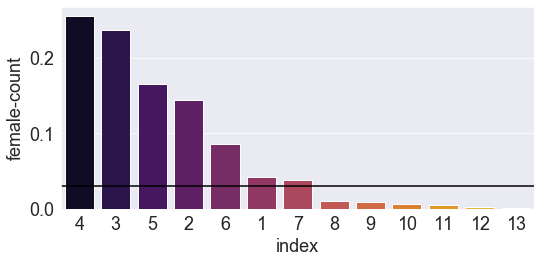

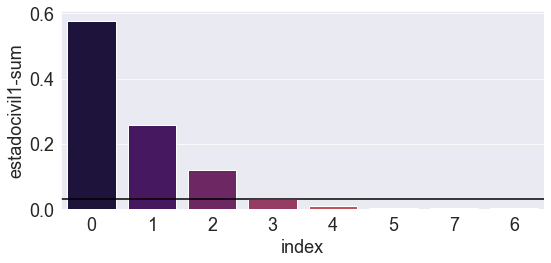

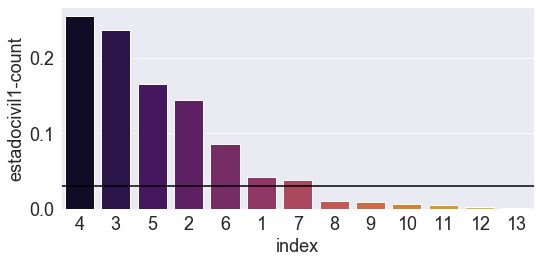

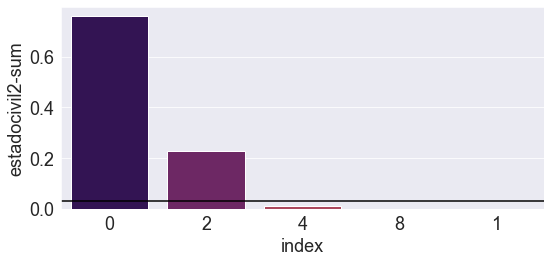

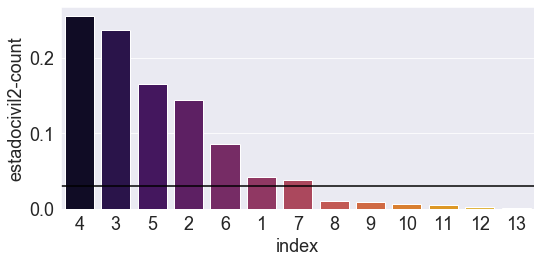

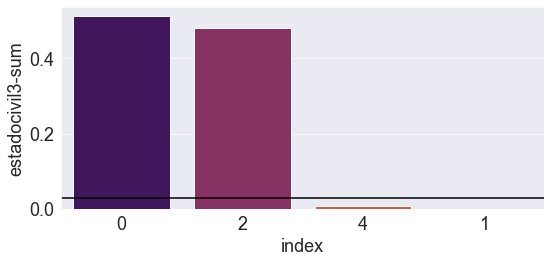

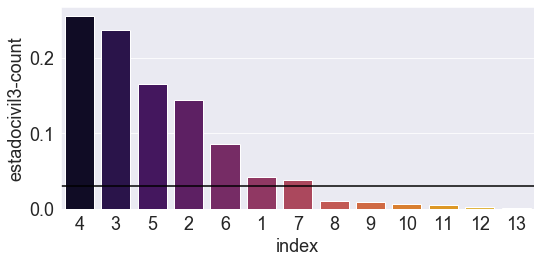

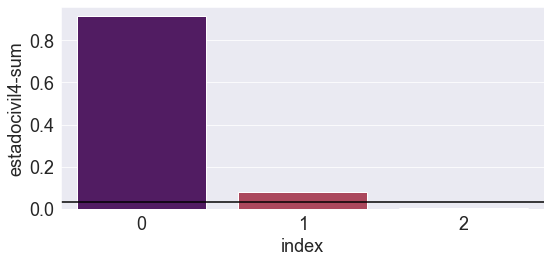

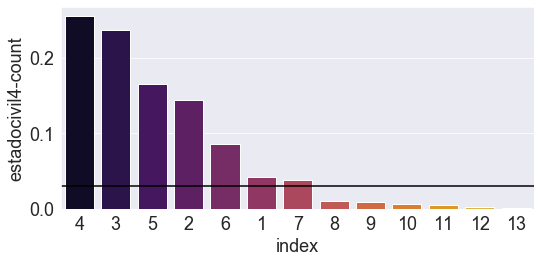

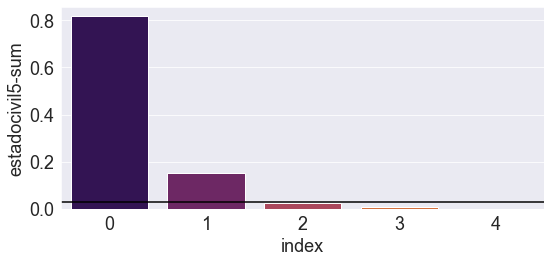

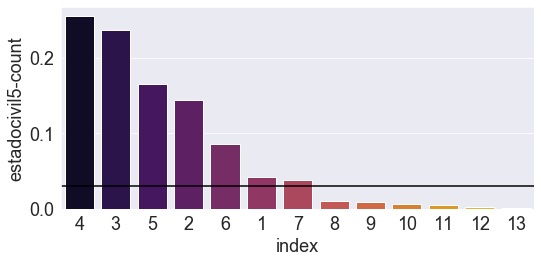

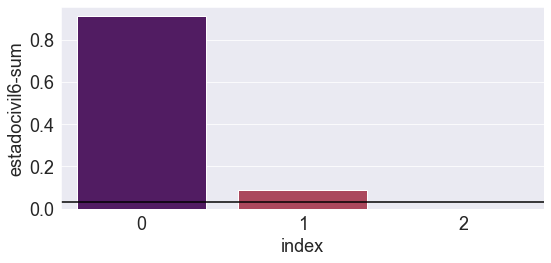

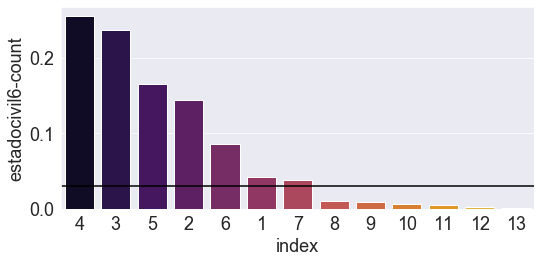

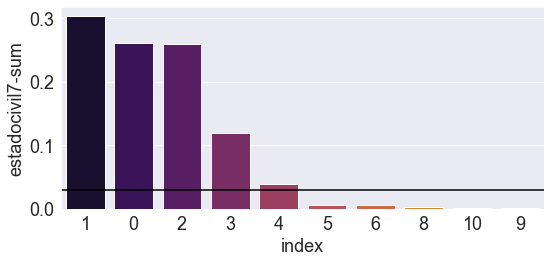

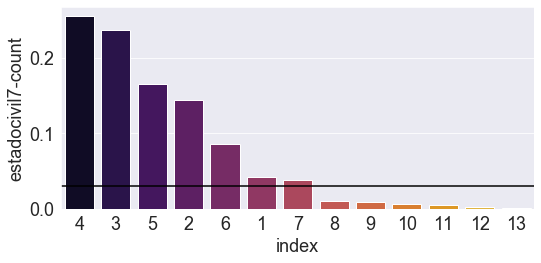

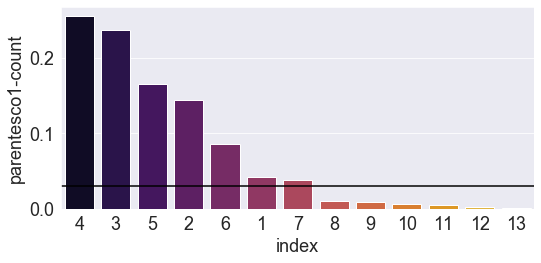

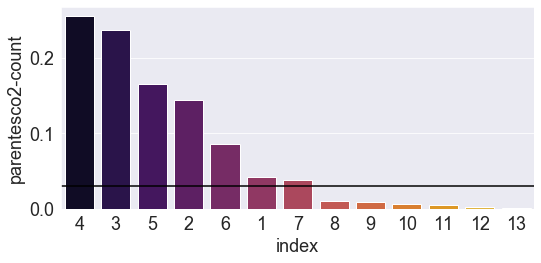

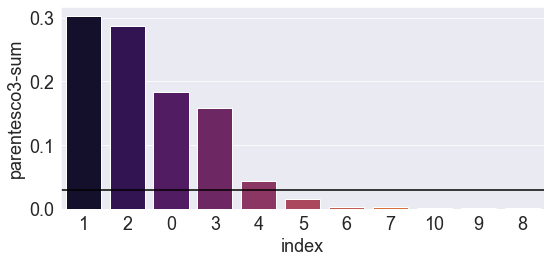

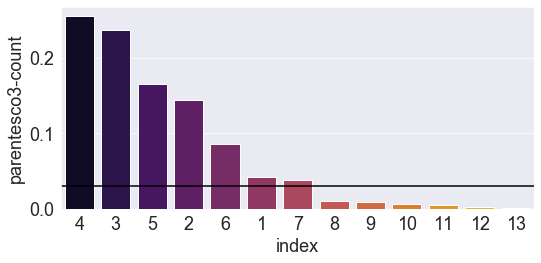

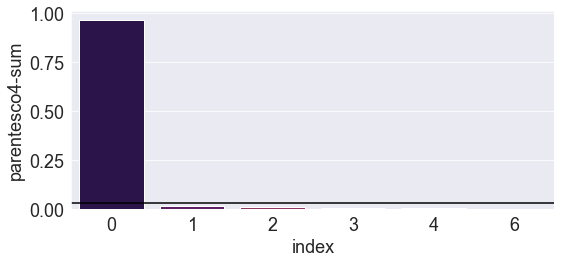

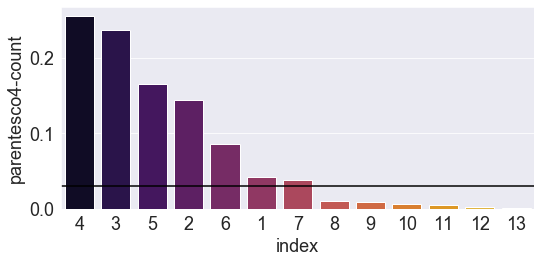

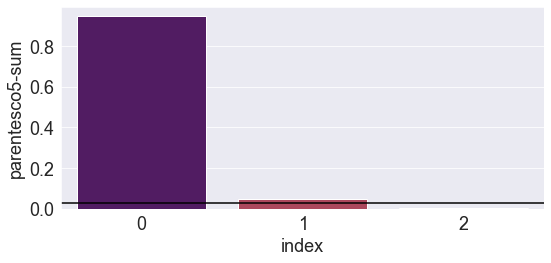

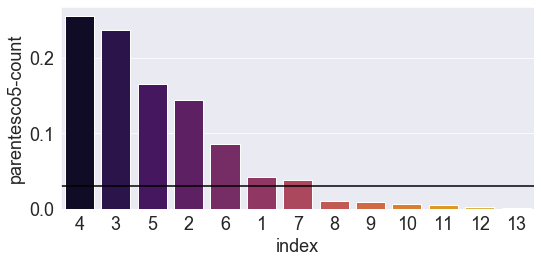

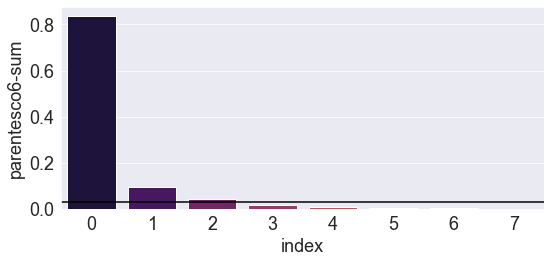

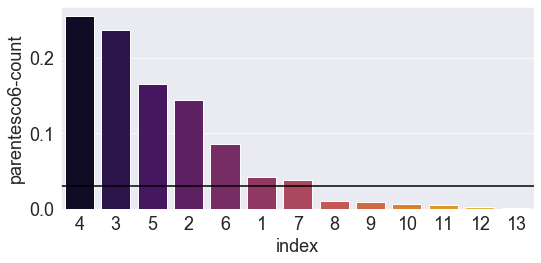

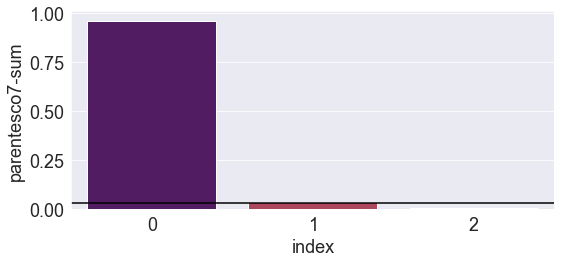

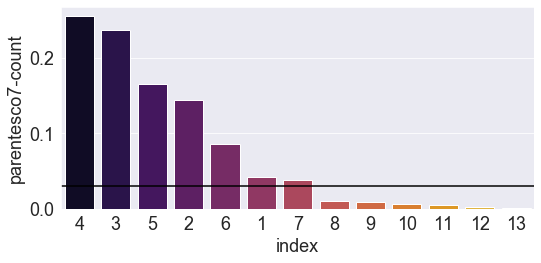

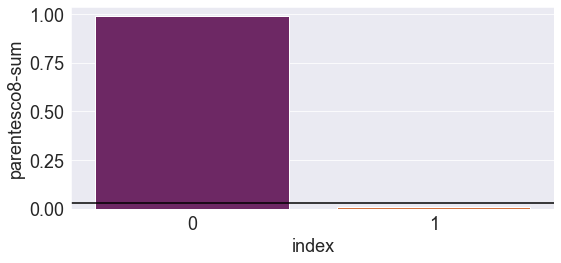

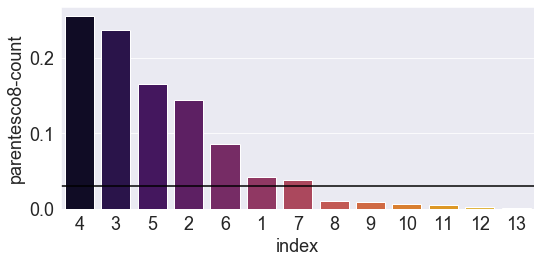

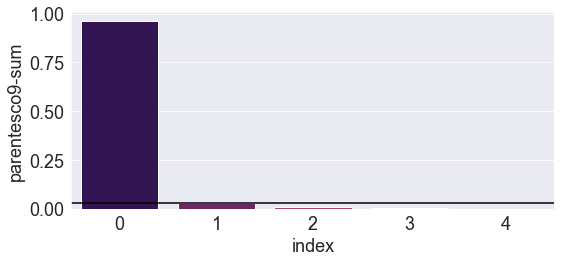

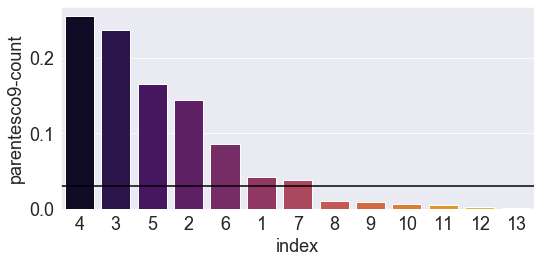

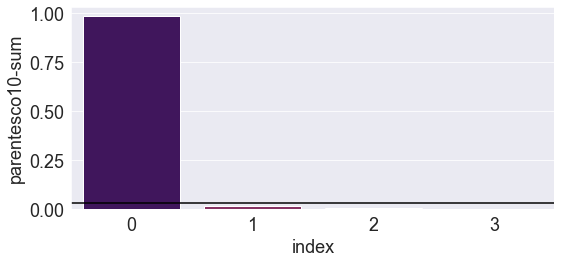

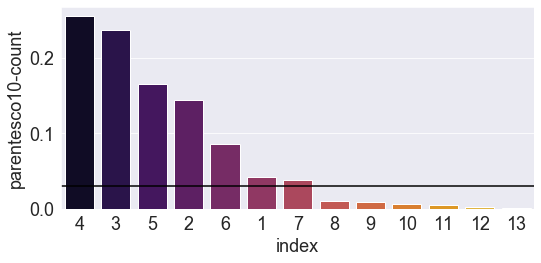

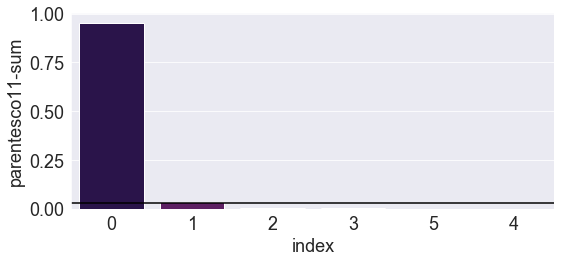

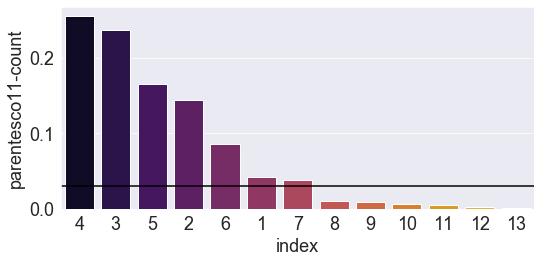

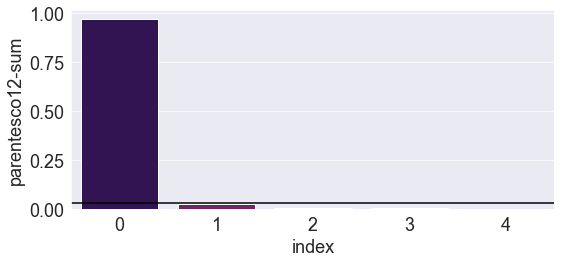

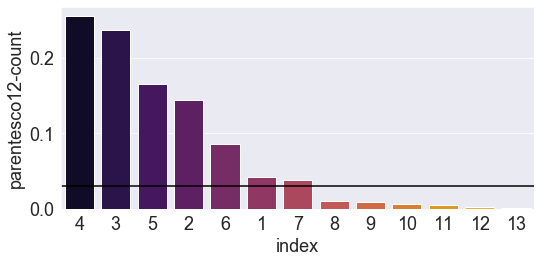

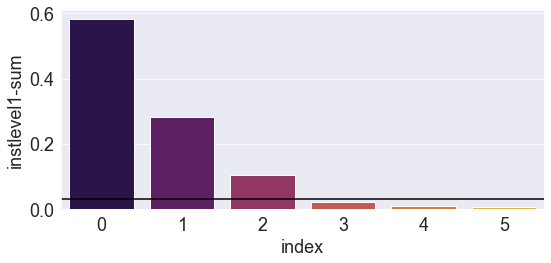

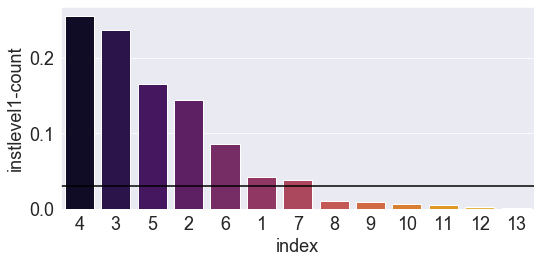

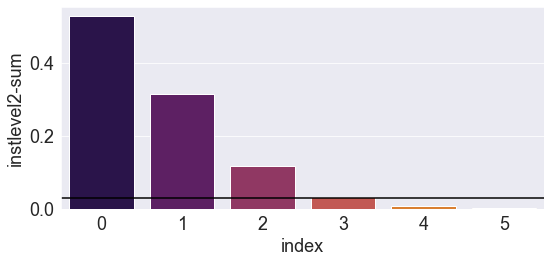

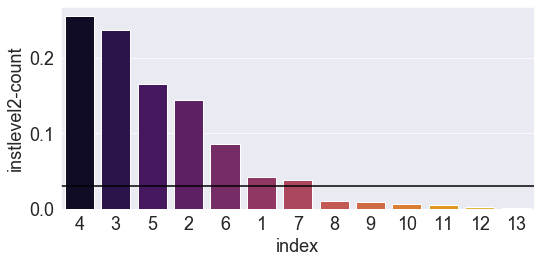

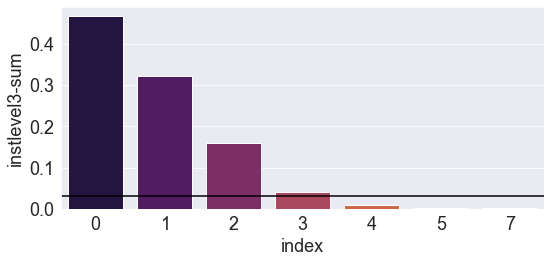

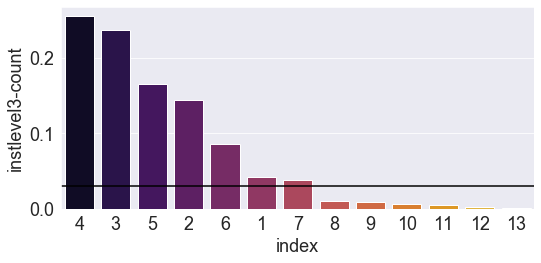

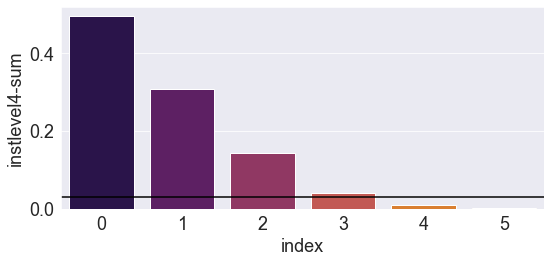

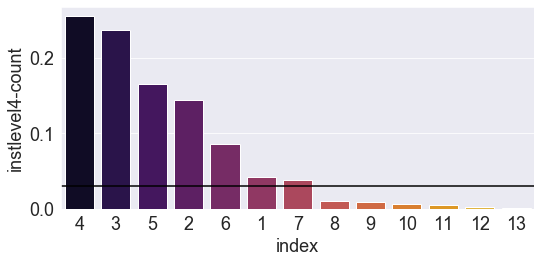

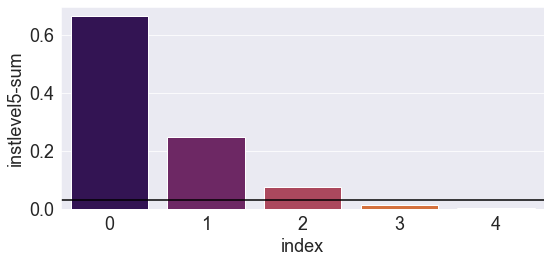

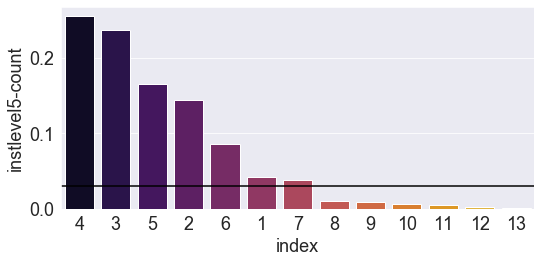

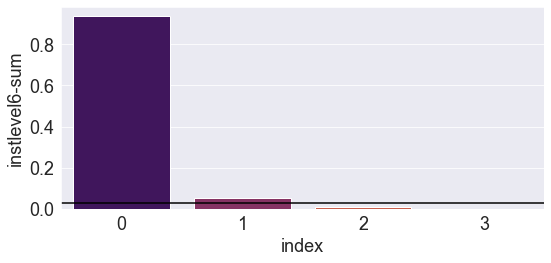

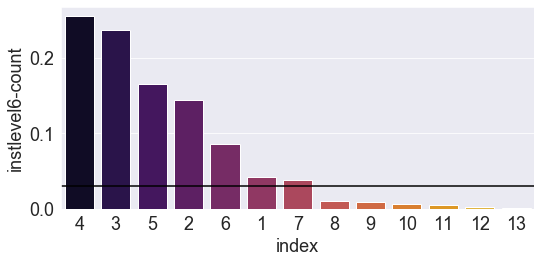

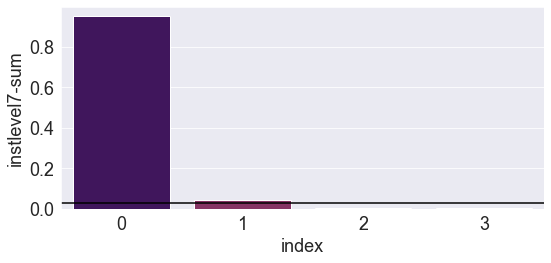

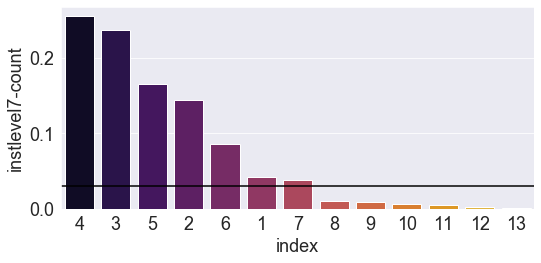

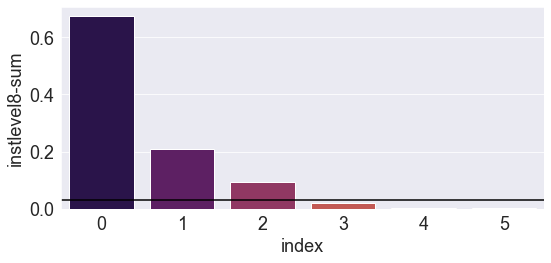

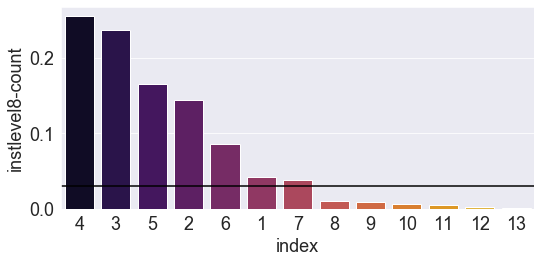

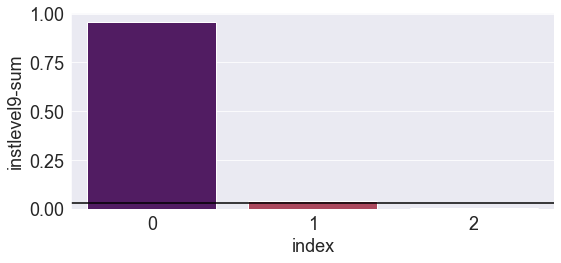

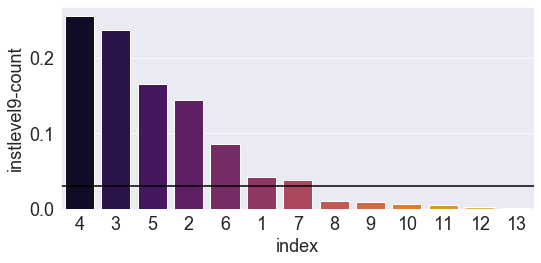

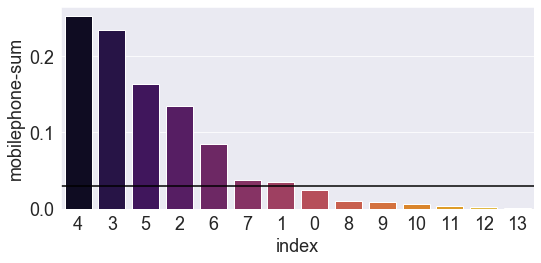

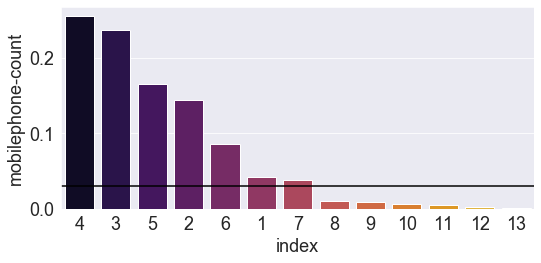

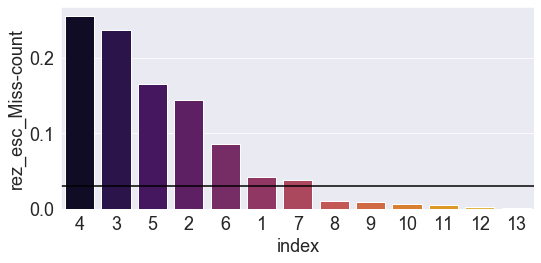

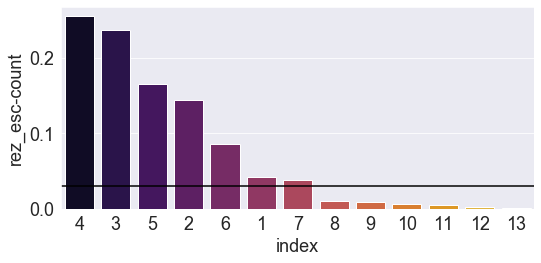

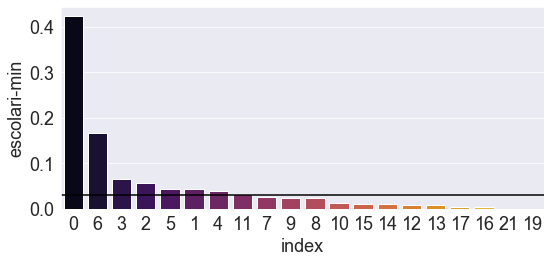

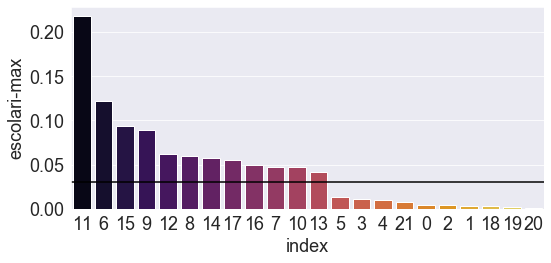

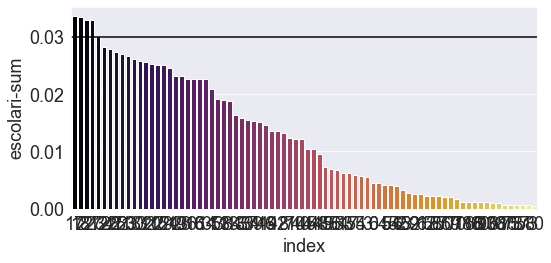

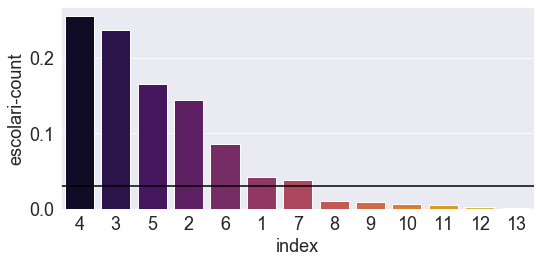

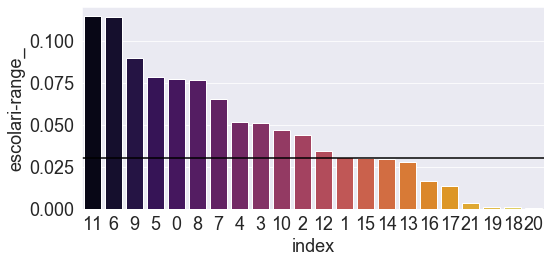

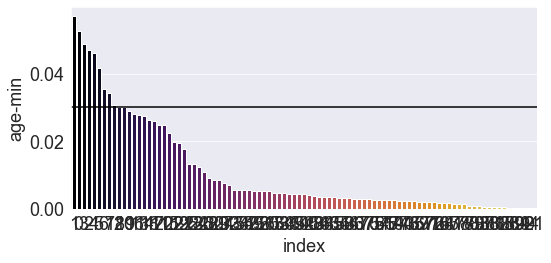

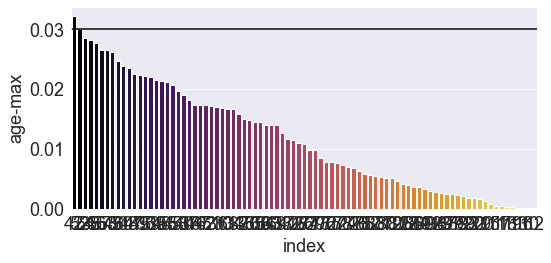

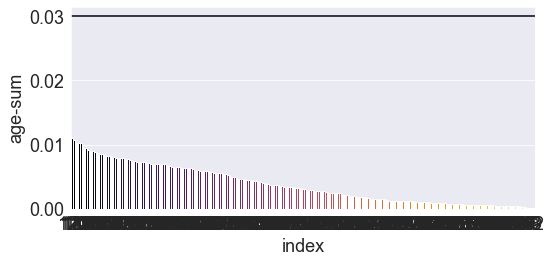

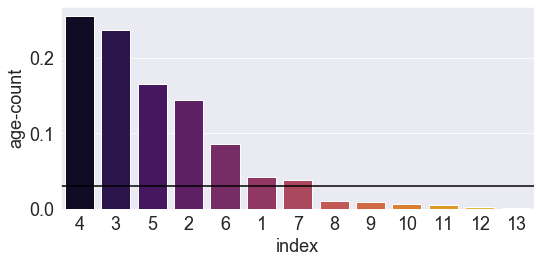

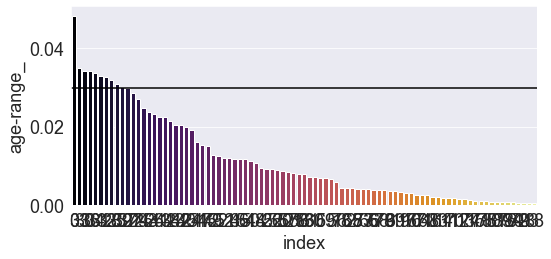

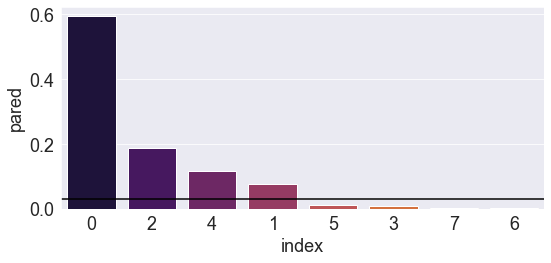

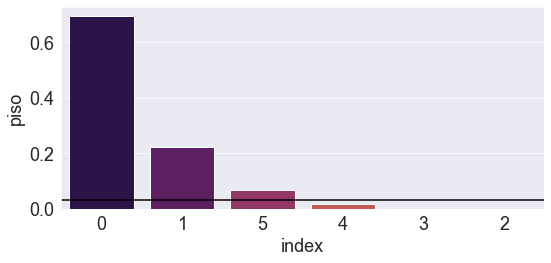

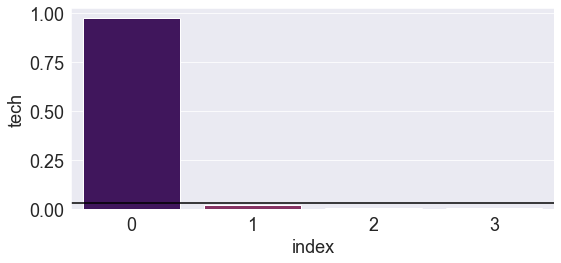

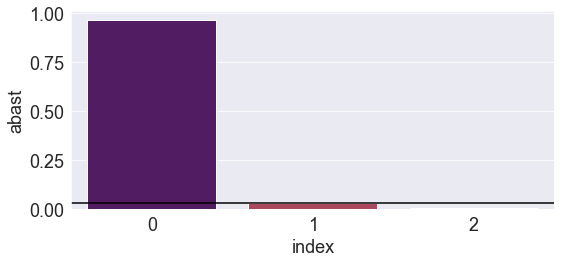

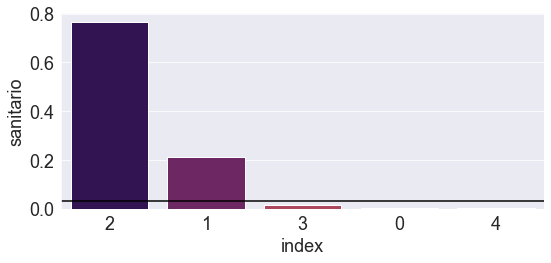

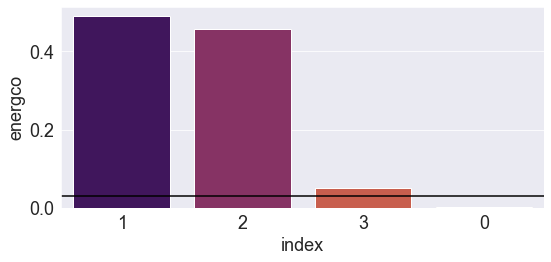

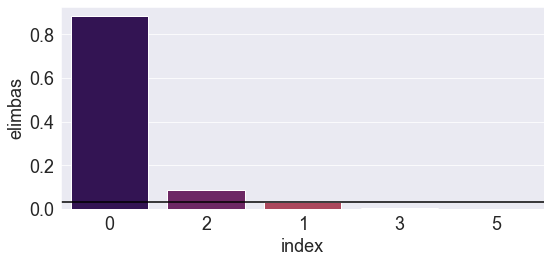

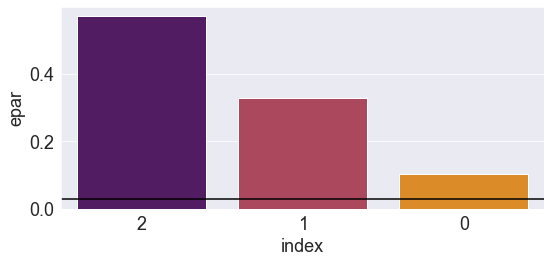

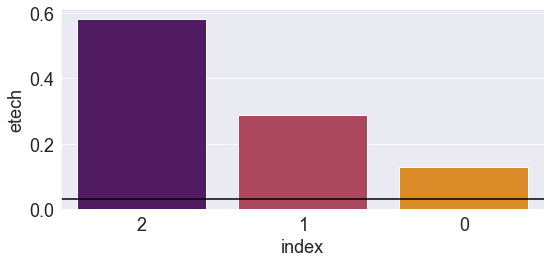

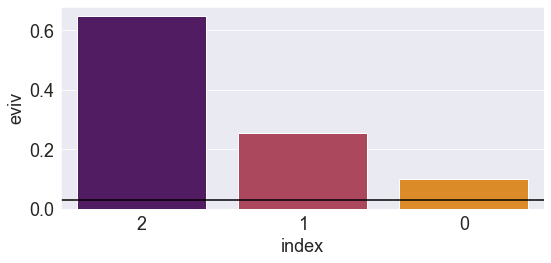

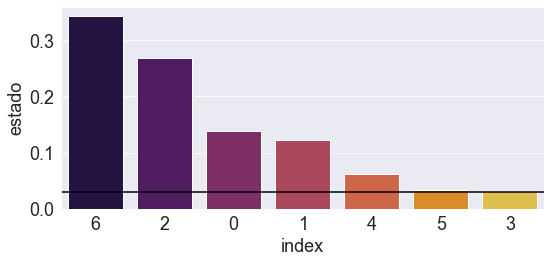

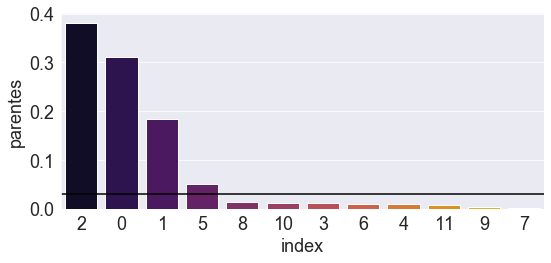

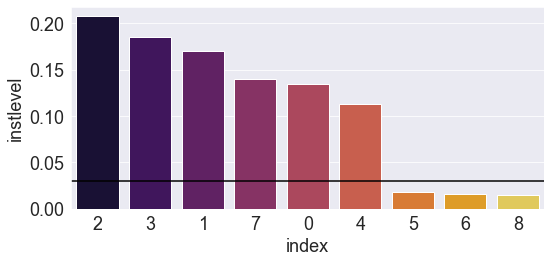

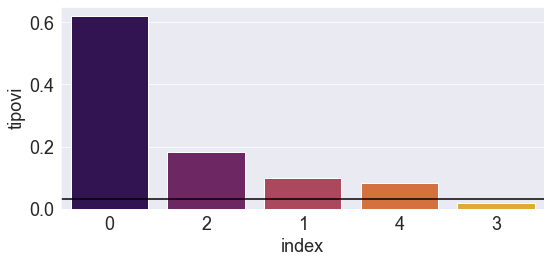

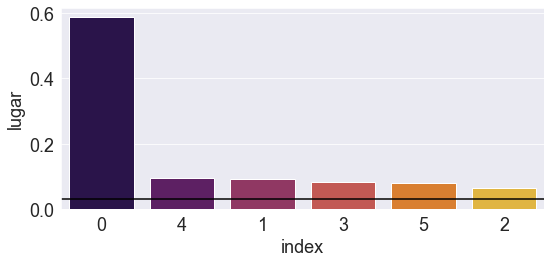

In [615]:
for i in int_plus:
    plot_rare(data_merge , i)

In [616]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = data_merge[:len(train)].groupby([variable])[variable].count()/np.float(len(train))
    frequent_cat = [x for x in temp.loc[temp>0.05].index.values]
    
    data_merge[variable] = np.where(data_merge[variable].isin(frequent_cat), data_merge[variable], 9999)

In [617]:
tmp = [ 'v18q-sum',
                 'v18q-count',
                 'dis-sum',
                 'dis-count',
                 'male-sum',
                 'male-count',
                 'female-sum',
                 'female-count',
                 'estadocivil1-sum',
                 'estadocivil1-count',
                 'estadocivil2-sum',
                 'estadocivil2-count',
                 'estadocivil3-sum',
                 'estadocivil3-count',
                 'estadocivil4-sum',
                 'estadocivil4-count',
                 'estadocivil5-sum',
                 'estadocivil5-count',
                 'estadocivil6-sum',
                 'estadocivil6-count',
                 'estadocivil7-sum',
                 'estadocivil7-count',
                 'parentesco1-count',
                 'parentesco2-count',
                 'parentesco3-sum',
                 'parentesco3-count',
                 'parentesco4-sum',
                 'parentesco4-count',
                 'parentesco5-sum',
                 'parentesco5-count',
                 'parentesco6-sum',
                 'parentesco6-count',
                 'parentesco7-sum',
                 'parentesco7-count',
                 'parentesco8-sum',
                 'parentesco8-count',
                 'parentesco9-sum',
                 'parentesco9-count',
                 'parentesco10-sum',
                 'parentesco10-count',
                 'parentesco11-sum',
                 'parentesco11-count',
                 'parentesco12-sum',
                 'parentesco12-count',
                 'instlevel1-sum',
                 'instlevel1-count',
                 'instlevel2-sum',
                 'instlevel2-count',
                 'instlevel3-sum',
                 'instlevel3-count',
                 'instlevel4-sum',
                 'instlevel4-count',
                 'instlevel5-sum',
                 'instlevel5-count',
                 'instlevel6-sum',
                 'instlevel6-count',
                 'instlevel7-sum',
                 'instlevel7-count',
                 'instlevel8-sum',
                 'instlevel8-count',
                 'instlevel9-sum',
                 'instlevel9-count',
                 'mobilephone-sum',
                 'mobilephone-count',
                 'rez_esc_Miss-count',
                 'rez_esc-count',
                 'escolari-min',
                 'escolari-max',
                 'escolari-sum',
                 'escolari-count',
                 'escolari-range_',
                 'age-min',
                 'age-max',
                 'age-sum',
                 'age-count',
                 'age-range_','age','agesq','SQBaage']

In [618]:
tmp

['v18q-sum',
 'v18q-count',
 'dis-sum',
 'dis-count',
 'male-sum',
 'male-count',
 'female-sum',
 'female-count',
 'estadocivil1-sum',
 'estadocivil1-count',
 'estadocivil2-sum',
 'estadocivil2-count',
 'estadocivil3-sum',
 'estadocivil3-count',
 'estadocivil4-sum',
 'estadocivil4-count',
 'estadocivil5-sum',
 'estadocivil5-count',
 'estadocivil6-sum',
 'estadocivil6-count',
 'estadocivil7-sum',
 'estadocivil7-count',
 'parentesco1-count',
 'parentesco2-count',
 'parentesco3-sum',
 'parentesco3-count',
 'parentesco4-sum',
 'parentesco4-count',
 'parentesco5-sum',
 'parentesco5-count',
 'parentesco6-sum',
 'parentesco6-count',
 'parentesco7-sum',
 'parentesco7-count',
 'parentesco8-sum',
 'parentesco8-count',
 'parentesco9-sum',
 'parentesco9-count',
 'parentesco10-sum',
 'parentesco10-count',
 'parentesco11-sum',
 'parentesco11-count',
 'parentesco12-sum',
 'parentesco12-count',
 'instlevel1-sum',
 'instlevel1-count',
 'instlevel2-sum',
 'instlevel2-count',
 'instlevel3-sum',
 'instlev

In [619]:
int_rare = [i for i in int_plus if i not in tmp]

In [620]:
int_rare

['rooms',
 'r4h1',
 'r4h2',
 'r4h3',
 'r4m1',
 'r4m2',
 'r4m3',
 'r4t1',
 'r4t2',
 'r4t3',
 'tamhog',
 'tamviv',
 'escolari',
 'hhsize',
 'hogar_nin',
 'hogar_adul',
 'hogar_mayor',
 'hogar_total',
 'bedrooms',
 'qmobilephone',
 'SQBescolari',
 'SQBage',
 'SQBhogar_total',
 'SQBedjefe',
 'SQBhogar_nin',
 'pared',
 'piso',
 'tech',
 'abast',
 'sanitario',
 'energco',
 'elimbas',
 'epar',
 'etech',
 'eviv',
 'estado',
 'parentes',
 'instlevel',
 'tipovi',
 'lugar']

In [621]:
for i in int_rare:
    rare_imputation(i)

In [622]:
obj_plus = obj.drop(['Id','idhogar'])

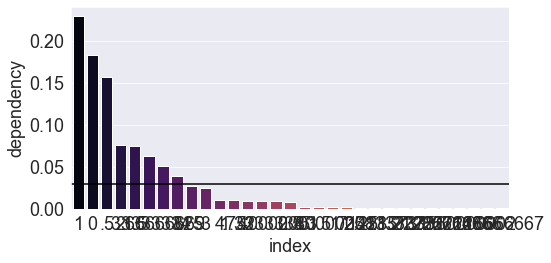

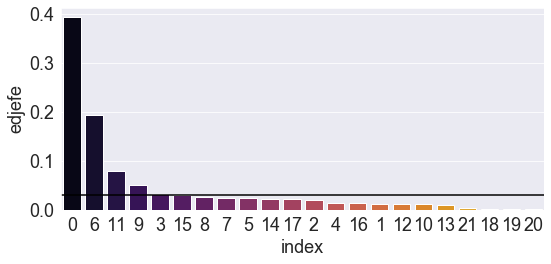

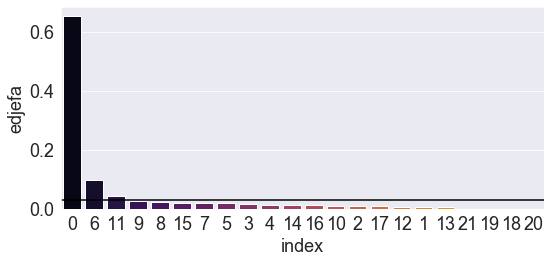

In [623]:
for i in obj_plus:
    plot_rare(data,i)

In [624]:
for i in obj_plus:
    rare_imputation(i)

### Variable Transformation

In [625]:
flt = list(flt.drop('Target'))

In [626]:
data_merge[flt].describe()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
count,3.341300e+04,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000,33413.000000
mean,6.041218e+04,0.324335,0.075899,9.178623,1.631687,3.474577,4.094081,101.085566
std,1.129740e+05,0.677188,0.681139,4.103529,0.901221,6.053864,12.939225,90.421057
min,0.000000e+00,0.000000,0.000000,0.000000,0.142857,0.020408,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,6.000000,1.000000,1.000000,0.111111,36.000000
50%,0.000000e+00,0.000000,0.000000,8.666667,1.500000,2.250000,0.444444,75.111115
75%,1.250000e+05,0.000000,0.000000,11.500000,2.000000,4.000000,1.777778,132.250000
max,2.852700e+06,6.000000,99.000000,37.000000,13.000000,169.000000,64.000000,1369.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B58B3AA3C8>,
      dtype=object)

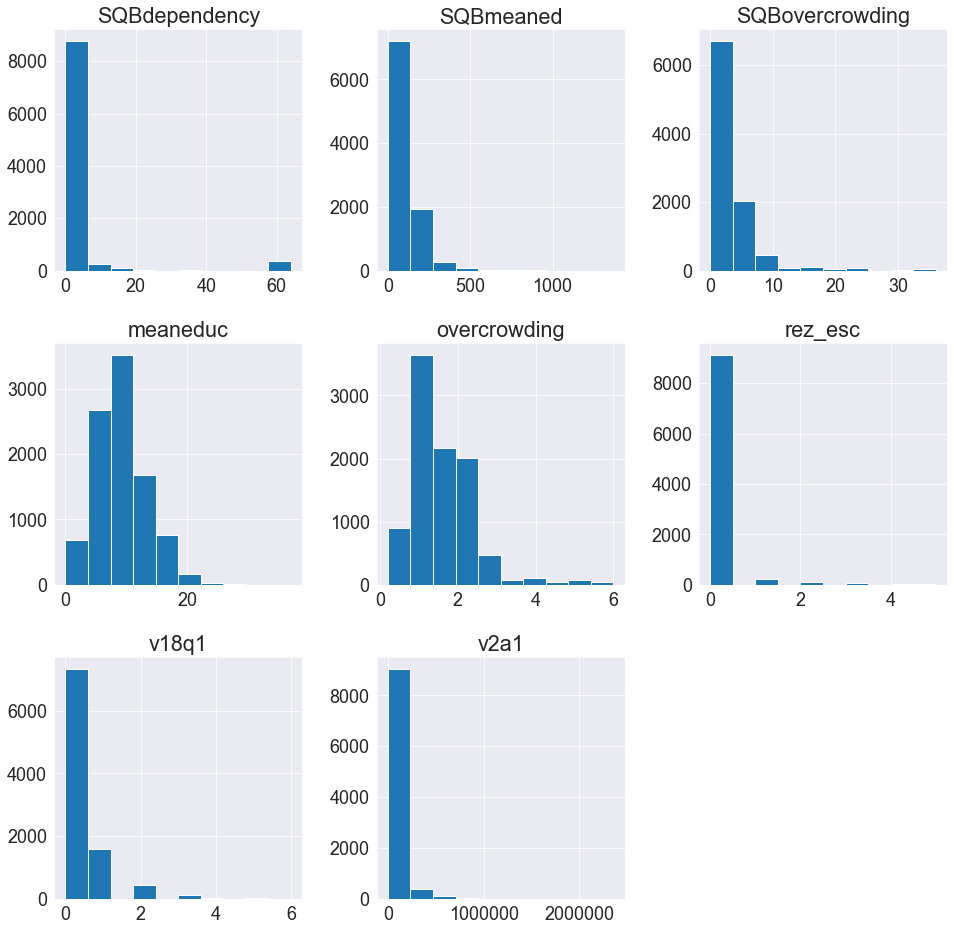

In [627]:
data_merge[:len(train)][flt].hist(figsize = (16,16))

In [628]:
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [629]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
data_train_t = transformer.fit_transform(data_merge[:len(train)][flt])
data_test_t = transformer.transform(data_merge[len(train):][flt])

In [630]:
# data_train_t = pd.DataFrame(data_train_t, columns = flt)
# data_test_t = pd.DataFrame(data_test_t, columns = flt)

In [631]:
for i,var in enumerate(flt):
    data_merge[:len(train)][var] = data_train_t[:,i]
    data_merge[len(train):][var] = data_test_t[:,i]

In [632]:
data_merge.isnull().sum().sort_values()

idhogar                    0
instlevel1-sum             0
instlevel1-max             0
instlevel1-min             0
parentesco12-range_        0
                       ...  
estadocivil2-range_        0
estadocivil2-std           0
estadocivil3-std           0
lugar                      0
Target                 23856
Length: 298, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B58B719CC8>,
      dtype=object)

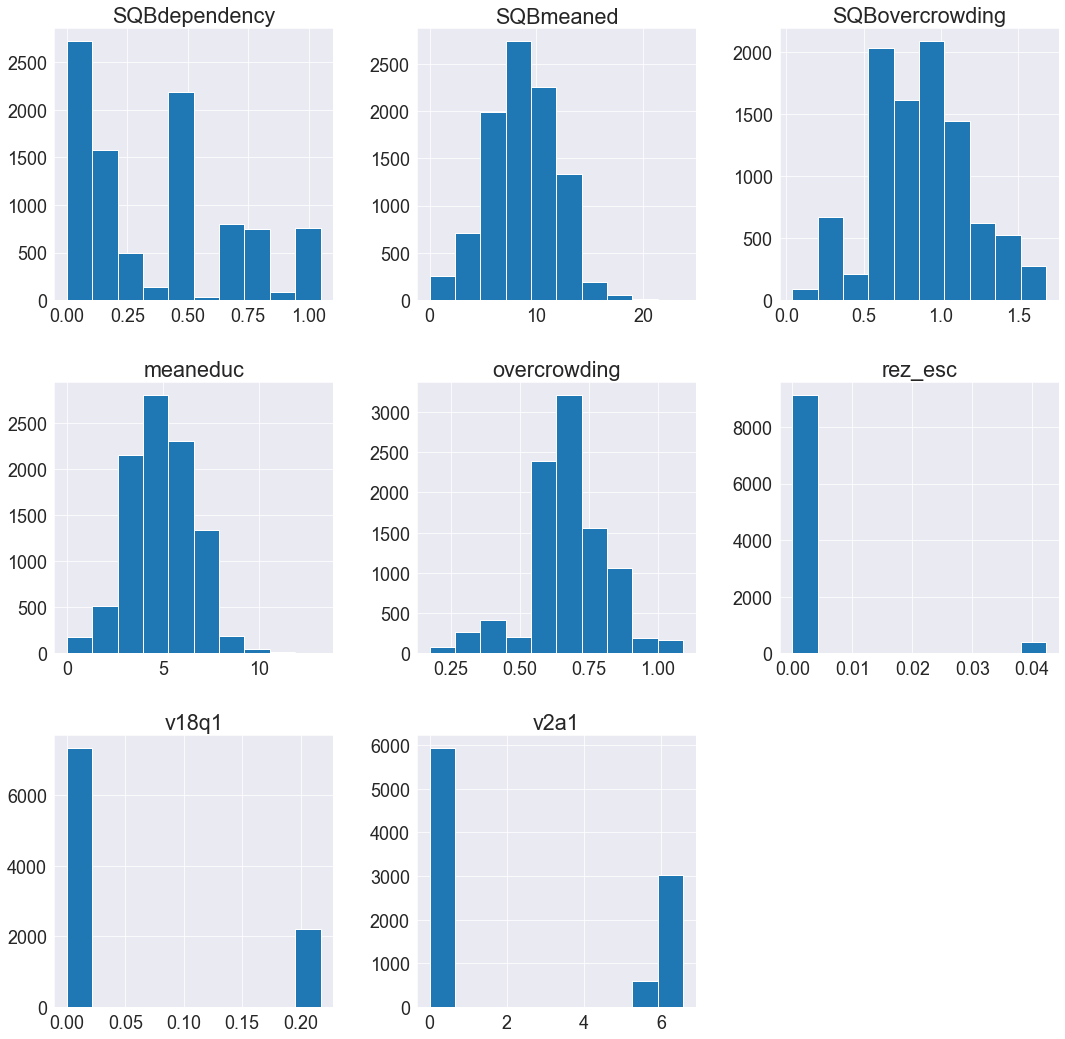

In [633]:
data_merge[:len(train)][flt].hist(figsize = (18,18))

### Feature Selection

In [634]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [635]:
def basic_methods(data):
    constant_features = [feat for feat in data.columns if data[feat].std() == 0]
    data.drop(constant_features, axis=1, inplace=True)
    print('Shape :',data.shape)
    
    sel = VarianceThreshold(threshold=0.01)  
    sel.fit(data)  
    features_to_keep = data.columns[sel.get_support()]
    data = sel.transform(data)
    data= pd.DataFrame(data)
    data.columns = features_to_keep
    print('Shape :',data.shape)
    
    duplicated_feat = []
    for i in range(0, len(data.columns)):
        col_1 = data.columns[i]
    for col_2 in data.columns[i + 1:]:
        if data[col_1].equals(data[col_2]):
            duplicated_feat.append(col_2)
    data.drop(labels=duplicated_feat, axis=1, inplace=True)
    print('Shape :',data.shape)
    
    return data   

In [636]:
def correlation(data):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.85: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    data.drop(labels = col_corr , axis = 1 , inplace = True)
    print('Shape :',data.shape)
    return data,col_corr

In [637]:
data_merge.dependency = data_merge.dependency.astype(float)
data_merge.edjefa = data_merge.edjefa.astype(float)
data_merge.edjefe = data_merge.edjefe.astype(float)

In [638]:
train_set = data_merge[:len(train)].drop(columns = ['Id', 'idhogar', 'Target'])
train_labels = data_merge[:len(train)]['Target']
test_set = data_merge[len(train):].drop(['Id','idhogar','Target'],axis =1)
submission_base = test[['Id','idhogar']]

In [639]:
test_set.shape

(23856, 295)

In [640]:
train_set.shape

(9557, 295)

In [641]:
train_set = basic_methods(train_set)

Shape : (9557, 282)
Shape : (9557, 263)
Shape : (9557, 263)


In [642]:
train_set,col = correlation(train_set)

Shape : (9557, 131)


In [643]:
col

{'SQBedjefe',
 'SQBescolari',
 'SQBhogar_nin',
 'SQBhogar_total',
 'SQBmeaned',
 'SQBovercrowding',
 'age-count',
 'age-range_',
 'agesq',
 'area2',
 'coopele',
 'dis-count',
 'dis-range_',
 'dis-sum',
 'escolari-count',
 'escolari-range_',
 'estadocivil1-count',
 'estadocivil1-range_',
 'estadocivil2-count',
 'estadocivil2-range_',
 'estadocivil2-sum',
 'estadocivil3-count',
 'estadocivil3-range_',
 'estadocivil3-sum',
 'estadocivil4-count',
 'estadocivil4-range_',
 'estadocivil4-sum',
 'estadocivil5-count',
 'estadocivil5-range_',
 'estadocivil5-sum',
 'estadocivil6-count',
 'estadocivil6-range_',
 'estadocivil6-sum',
 'estadocivil7-count',
 'estadocivil7-range_',
 'female',
 'female-count',
 'female-max',
 'female-min',
 'female-range_',
 'female-std',
 'hhsize',
 'hogar_total',
 'instlevel1-count',
 'instlevel1-range_',
 'instlevel1-std',
 'instlevel2-count',
 'instlevel2-range_',
 'instlevel3-count',
 'instlevel3-range_',
 'instlevel4-count',
 'instlevel4-range_',
 'instlevel5-cou

In [644]:
train_set.head()

,v2a1,hacdor,rooms,hacapo,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,escolari,cielorazo,public,dis,male,hogar_nin,hogar_adul,hogar_mayor,dependency,edjefe,edjefa,meaneduc,bedrooms,overcrowding,computer,television,mobilephone,qmobilephone,area1,age,SQBdependency,rez_esc_Miss,v2a1_Mis,v18q-count,v18q-std,dis-max,dis-std,male-min,male-max,male-sum,female-sum,estadocivil1-max,estadocivil1-sum,estadocivil1-std,estadocivil2-min,estadocivil2-max,estadocivil2-std,estadocivil3-min,estadocivil3-max,estadocivil3-std,estadocivil4-max,estadocivil4-std,estadocivil5-min,estadocivil5-max,estadocivil5-std,estadocivil6-max,estadocivil6-std,estadocivil7-min,estadocivil7-max,estadocivil7-sum,estadocivil7-std,parentesco2-max,parentesco2-std,parentesco3-max,parentesco3-sum,parentesco3-std,parentesco4-max,parentesco5-max,parentesco6-max,parentesco6-sum,parentesco6-std,parentesco7-max,parentesco8-max,parentesco9-max,parentesco10-max,parentesco11-max,parentesco11-sum,parentesco12-max,instlevel1-max,instlevel1-sum,instlevel2-min,instlevel2-max,instlevel2-sum,instlevel2-std,instlevel3-min,instlevel3-max,instlevel3-sum,instlevel3-std,instlevel4-min,instlevel4-max,instlevel4-sum,instlevel4-std,instlevel5-max,instlevel5-std,instlevel6-max,instlevel7-max,instlevel8-min,instlevel8-max,instlevel8-std,instlevel9-max,rez_esc_Miss-max,rez_esc_Miss-std,rez_esc-max,escolari-min,escolari-max,escolari-sum,escolari-std,age-min,age-max,age-sum,age-std,pared,piso,tech,abast,sanitario,energco,elimbas,epar,etech,eviv,estado,parentes,instlevel,tipovi,lugar
0,6.121332,0.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9999.0,9999.0,0.0,1.0,9999.0,9999.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,9999.0,0.0,5.377857,1.0,0.555694,0.0,0.0,1.0,1.0,1.0,43.0,-0.000000,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,-1.0,0.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,10.0,10.0,10.0,-1.000000,43.0,43.0,43.0,-1.000000,0.0,0.0,9999.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,9999.0,0.0,3.0,2.0,0.0
1,6.048950,0.0,4.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,9999.0,9999.0,0.0,1.0,9999.0,9999.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,9999.0,9999.0,0.0,6.122949,1.0,0.555694,0.0,0.0,1.0,1.0,1.0,67.0,1.048709,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.00000,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,-1.0,0.0,12.0,12.0,12.0,-1.000000,67.0,67.0,67.0,-1.000000,4.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,9999.0,0.0,7.0,2.0,0.0
2,-0.000000,0.0,9999.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,9999.0,11.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,9999.0,0.0,9999.0,5.756583,2.0,0.355532,0.0,0.0,0.0,9999.0,1.0,92.0,1.048709,0.0,0.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.0,1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,-1.00000,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,11.0,11.0,11.0,-1.000000,92.0,92.0,92.0,-1.000000,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,9999.0,0.0,4.0,0.0,0.0
3,6.110093,0.0,5.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,3.0,4.0,9.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,11.0,0.0,5.756583,3.0,0.648234,0.0,0.0,1.0,3.0,1.0,17.0,0.510233,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,0.5,0.0,1.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.5,1.0,2.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0,0.57735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,11.0,33.0,4.272002,8.0,38.0,100.0,14.899664,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,2.0,6.0,2.0,3.0,2.0,0.0
4,6.110093,0.0,5.0,0.0,1.

In [645]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [646]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [647]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [648]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.38738 with std: 0.04844


In [649]:
model = RandomForestClassifier(100, random_state=10)

In [651]:
model.fit(train_set,train_labels)

predict = model.predict(test_set[train_set.columns])

In [660]:
predict.shape

(23856,)

In [ ]:
prediction = pd.DataFrame({'Id' : submission_base['Id'] , 'Target' : predict})
submission = submission_base.merge(prediction,on = 'Id').drop('idhogar',axis = 1)
submission['Target'] = submission['Target'].astype('int')
submission.to_csv('sub_base.csv',index = False)